# 0. Import libraries

In [937]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from itertools import combinations

from prince import MCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency, f_oneway, kruskal, ttest_ind
from scipy.spatial.distance import cdist
from statsmodels.stats.multitest import multipletests


from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from skmultilearn.adapt import MLkNN

# 1. Load, Transform, Prepare and explore the data
'productiveTime_Proposed_sport', 'productiveTime_Proposed_attitude, 'hobbies_mobilePhone', 'hobbies_Proposed_sport', 'alienPerson_Proposed_environment', 'vices_Proposed_leavingHome'

Group ['vices_Proposed_chocolate', 'vices_Proposed_sweet', 'vices_Proposed_eat']

In [938]:
# Load data
encuesta=pd.read_csv('Encuesta_label4.csv')
columns=['temporalMark', 'PP_género', 'PP_edad', 'PP_estado_civil', 'PP_convivencia', 'PP_educación', 'PP_ocupación', 'PP_área', 'PP_dónde_vives', 'PP_zona', 'PP_tiempo_residencia', 'PP_sobre_ti', 'IND_individ_colect', 'IND_proyectos', 'IND_conflicto', 'IND_trabajo_equipo', 'IND_act_comunitarias', 'PUE_preferencias_entorno', 'PUE_rural_ciudad', 'PUE_rural_ciudad2', 'PUE_aire_libre', 'PUE_trabajos_agrícolas', 'PUE_alimmentación', 'PUE_ciudad_urbano', 'PUE_cultural_ciudad', 'PUE_ciudad_siempre', 'OBJ_zona_temperatura', 'OBJ_zona_clima', 'OBJ_zona_clima2', 'OBJ_zona_vivir', 'OBJ_zona_población', 'OBJ_zona_proximidad', 'TFM_espacios', 'TFM_actividades', 'TFM_compartir', 'TFM_compartir_no', 'TFM_muadrse', 'correo']
encuesta.columns = columns
encuesta.drop(['temporalMark'], axis=1, inplace=True)
print(encuesta.shape)
encuesta.head()

(85, 37)


PP_género        PP_edad             PP_estado_civil PP_convivencia   
0    Hombre          55-64  Separado/a // Divorciado/a           Solo  \
1     Mujer          55-64  Separado/a // Divorciado/a     En familia   
2    Hombre          25-34                   Soltero/a           Solo   
3     Mujer          55-64                   Soltero/a     En familia   
4    Hombre  65 años o más                    Casado/a      En pareja   

                  PP_educación   PP_ocupación   
0      Universitario/a (Grado)     Autónomo/a  \
1  Bachillerato / preparatoria     Jubilado/a   
2      Universitario/a (Grado)  Desempleado/a   
3      Universitario/a (Grado)     Jubilado/a   
4         Postgrado / Maestría     Jubilado/a   

                                             PP_área PP_dónde_vives   
0                                Ventas Construccion         Ciudad  \
1  Negocios, administración empresarial, emprendi...         Ciudad   
2                                       Arquitectura         Ciudad   
3  Humanidades y artes;Educación y pedagogía;Serv...         Ciudad   
4  Tecnología y computación;Salud y medicina;Nego...         Ciudad   

                                        PP_zona PP_tiempo_residencia  ...   
0                              Zona residencial             1-5 años  ...  \
1                              Zona residencial             1-5 años  ...   
2                              Zona residencial            6-10 años  ...   
3                              Zona residencial       Más de 10 años  ...   
4  Zona industrial o comercial;Zona residencial       Más de 10 años  ...   

  OBJ_zona_clima2                 OBJ_zona_vivir   
0            Seco                   Zona costera  \
1            Seco                   Zona costera   
2            Seco                Zona de montaña   
3          Húmedo  Zona de montaña;Zona forestal   
4      Cualquiera                  Zona forestal   

                   OBJ_zona_población        OBJ_zona_proximidad   
0  Medio (ciudad pequeña: Granollers)  Mucho (deben estar cerca)  \
1      Alto (ciudad media: Barcelona)                      Medio   
2      Alto (ciudad media: Barcelona)  Mucho (deben estar cerca)   
3  Medio (ciudad pequeña: Granollers)  Mucho (deben estar cerca)   
4      Alto (ciudad media: Barcelona)  Mucho (deben estar cerca)   

                                       TFM_espacios   
0         Dormitorio (dormir + otros);Cocina;Jardín  \
1  Dormitorio (dormir + otros);Cocina;Sala de estar   
2    Dormitorio (dormir + otros);Baño;Sala de estar   
3                       Cocina;Sala de estar;Jardín   
4  Dormitorio (dormir + otros);Sala de estar;Jardín   

                                     TFM_actividades TFM_compartir   
0  Cocinar;Descansar (no cuenta dormir por la noc...            No  \
1  Cocinar;Ver contenido multimedia;Descansar (no...            No   
2                           Ver contenido multimedia            No   
3  Leer;Cocinar;Ver contenido multimedia;Descansa...            No   
4  Leer;Reuniones sociales en el hogar;Descansar ...            No   

  TFM_compartir_no TFM_muadrse                          correo  
0              NaN          No                             NaN  
1              NaN          No  rosalba.loaiza.ayala@gmail.com  
2              NaN          No           juancid3103@gmail.com  
3              NaN          Si                             NaN  
4              NaN          No            medicamex@gmail.com   

[5 rows x 37 columns]

In [939]:
encuesta.iloc[:,0:20].tail()

PP_género PP_edad  PP_estado_civil       PP_convivencia   
80    Hombre   18-24        Soltero/a           En familia  \
81     Mujer   25-34  En una relación            En pareja   
82    Hombre   25-34        Soltero/a  Vivo con mis padres   
83     Mujer   18-24        Soltero/a  Vivo con mis padres   
84    Hombre   25-34        Soltero/a           Con amigos   

                                         PP_educación   
80  Primaria o menos;Secundaria;Bachillerato / pre...  \
81       Universitario/a (Grado);Postgrado / Maestría   
82  Primaria o menos;Secundaria;Bachillerato / pre...   
83                        Bachillerato / preparatoria   
84                               Postgrado / Maestría   

                                         PP_ocupación   
80                                      Desempleado/a  \
81                       Empleado/a a tiempo completo   
82                                      Desempleado/a   
83                                         Estudiante   
84  Estudiante;Empleado/a a tiempo completo;Autóno...   

                                              PP_área         PP_dónde_vives   
80  Humanidades y artes;Diseño;Arquitectura;Técnic...                 Ciudad  \
81                                       Arquitectura                 Ciudad   
82  Ciencias naturales;Tecnología y computación;In...                 Ciudad   
83                                             Diseño  Extrarradio de ciudad   
84          Humanidades y artes;Educación y pedagogía                 Ciudad   

                                              PP_zona PP_tiempo_residencia   
80  Zona industrial o comercial;Zona residencial;Z...             1-5 años  \
81                                   Zona residencial             1-5 años   
82                                   Zona residencial       Más de 10 años   
83                                   Zona residencial       Más de 10 años   
84                                   Zona residencial       Más de 10 años   

                                          PP_sobre_ti   
80  Dependo económicamente de alguien;Le doy mucha...  \
81  Tengo o dispongo de vehículo de transporte;La ...   
82  Tengo o dispongo de vehículo de transporte;Dep...   
83  Le doy mucha importancia a las actividades soc...   
84  Le doy mucha importancia a las actividades soc...   

                                   IND_individ_colect   
80  Me gusta asumir responsabilidades y liderar pr...  \
81  Me gusta asumir responsabilidades y liderar pr...   
82  Soy comunicativo y disfruto en conversaciones ...   
83  Soy comunicativo y disfruto en conversaciones ...   
84  Me gusta asumir responsabilidades y liderar pr...   

                                        IND_proyectos   
80  Proyectos que involucran colaboración y trabaj...  \
81  Proyectos que involucran colaboración y trabaj...   
82  Proyectos que te permiten trabajar de manera i...   
83  Proyectos que te permiten trabajar de manera i...   
84  Proyectos que te permiten trabajar de manera i...   

                                        IND_conflicto IND_trabajo_equipo   
80  Sí, siempre busco soluciones mutuamente benefi...           A menudo  \
81              A veces, dependiendo de la situación.           A menudo   
82  Sí, siempre busco soluciones mutuamente benefi...           A menudo   
83  Sí, siempre busco soluciones mutuamente benefi...           A menudo   
84  Sí, siempre busco soluciones mutuamente benefi...           A menudo   

   IND_act_comunitarias                           PUE_preferencias_entorno   
80             A menudo  Me siento en paz en espacios naturales como bo...  \
81             A menudo  Me siento en paz en espacios naturales como bo...   
82            Raramente  Me siento en paz en espacios naturales como bo...   
83             A menudo  Me siento en paz en espacios naturales como bo...   
84            Raramente  Me siento en paz en espacios naturales como bo...   

                     PUE_rural_ciudad  

In [940]:
encuesta.iloc[:,20:].tail()

PUE_trabajos_agrícolas                                  PUE_alimmentación   
80                     Sí                    Compro todo en un supermercado.  \
81                     Sí                    Compro todo en un supermercado.   
82                     No                    Compro todo en un supermercado.   
83                     Sí  Compro casi todo en el supermercado y cultivo ...   
84                     No                    Compro todo en un supermercado.   

   PUE_ciudad_urbano PUE_cultural_ciudad PUE_ciudad_siempre   
80       Área urbana               Mucho                 Sí  \
81       Área urbana                Algo                 Sí   
82       Área urbana                Algo                 Sí   
83       Área urbana                Algo                 Sí   
84       Gran ciudad                Algo                 Sí   

   OBJ_zona_temperatura                                     OBJ_zona_clima   
80                Medio  Que no cambien mucho las temperaturas a lo lar...  \
81                Medio  Que no cambien mucho las temperaturas a lo lar...   
82             Caliente  Que hayan extremos. Verano mucho calor e Invie...   
83                Medio  Que no cambien mucho las temperaturas a lo lar...   
84                Medio  Que no cambien mucho las temperaturas a lo lar...   

   OBJ_zona_clima2                OBJ_zona_vivir   
80      Cualquiera  Zona costera;Zona de montaña  \
81            Seco               Zona de montaña   
82      Cualquiera  Zona costera;Zona de montaña   
83      Cualquiera     No estoy seguro/No aplica   
84          Húmedo    Zona costera;Zona de campo   

                    OBJ_zona_población        OBJ_zona_proximidad   
80  Medio (ciudad pequeña: Granollers)                      Medio  \
81  Medio (ciudad pequeña: Granollers)                      Medio   
82  Medio (ciudad pequeña: Granollers)                      Medio   
83  Medio (ciudad pequeña: Granollers)  Mucho (deben estar cerca)   
84  Medio (ciudad pequeña: Granollers)                      Medio   

                                         TFM_espacios   
80  Fuera de casa (trabajo, estudio, ocio, etc…);D...  \
81  Fuera de casa (trabajo, estudio, ocio, etc…);S...   
82  Dormitorio (dormir + otros);Sala de estar;Terraza   
83  Fuera de casa (trabajo, estudio, ocio, etc…);D...   
84  Fuera de casa (trabajo, estudio, ocio, etc…);S...   

                                      TFM_actividades TFM_compartir   
80  Leer;Cocinar;Descansar (no cuenta dormir por l...            No  \
81  Leer;Reuniones sociales en el hogar;Descansar ...            No   
82  Leer;Ver contenido multimedia;Estudiar;Hacer d...            Si   
83  Leer;Ver contenido multimedia;Reuniones social...            Si   
84  Leer;Cocinar;Descansar (no cuenta dormir por l...            Si   

   TFM_compartir_no TFM_muadrse                             correo  
80            Todos          Si  rodrigoiglesiasmurrieta@gmail.com  
81    Sala de estar          Si                                NaN  
82    Sala de estar          Si                relookyou@gmail.com  
83           Cocina          Si          marta.dlatorreg@gmail.com  
84    Sala de estar          Si                                NaN

## 1.1 PP (Perfil personal)

### 1.1.1 PP_género_, XX_PP_edad, PP_estado_civil_, PP_convivencia_

PP_género
Mujer         52
Hombre        31
No binario     2
Name: count, dtype: int64

 (85, 40)


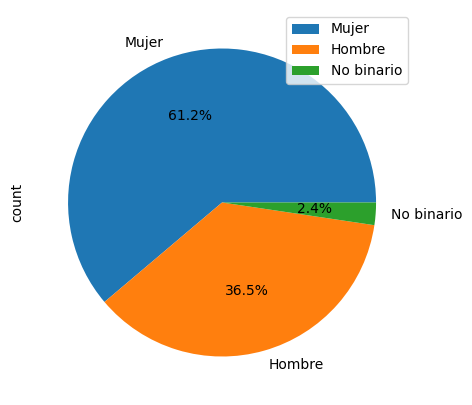

In [941]:
# PP_género_

# plot
print(encuesta['PP_género'].value_counts())
encuesta['PP_género'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_género']=="Mujer",'PP_género_Mujer']=1
encuesta['PP_género_Mujer']=encuesta['PP_género_Mujer'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="Hombre",'PP_género_Hombre']=1
encuesta['PP_género_Hombre']=encuesta['PP_género_Hombre'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="No binario",'PP_género_NB']=1
encuesta['PP_género_NB']=encuesta['PP_género_NB'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_género']=="Prefiero no decirlo",'PP_género_PND']=1
encuesta['PP_género_PND']=encuesta['PP_género_PND'].fillna(0).astype(int)

# Drop PP_género
encuesta.drop(['PP_género'], axis=1, inplace=True)
print("\n",encuesta.shape)

PP_edad
25-34            24
18-24            22
55-64            18
35-44             9
45-54             7
65 años o más     5
Name: count, dtype: int64

 (85, 40)


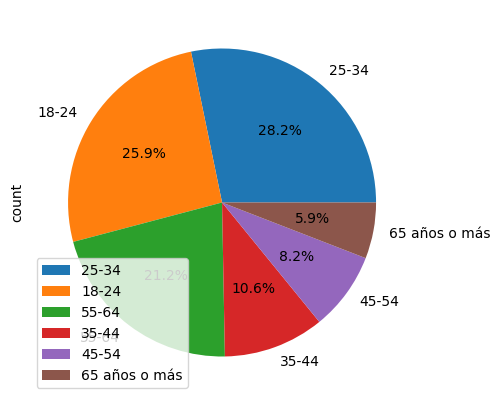

In [942]:
# XX_PP_edad

# plot
print(encuesta['PP_edad'].value_counts())
encuesta['PP_edad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to categorical
encuesta.loc[encuesta['PP_edad']=="Menos de 18 años",'PP_edadd']=0
encuesta.loc[encuesta['PP_edad']=="18-24",'PP_edadd']=1/6
encuesta.loc[encuesta['PP_edad']=="25-34",'PP_edadd']=2/6
encuesta.loc[encuesta['PP_edad']=="35-44",'PP_edadd']=3/6
encuesta.loc[encuesta['PP_edad']=="45-54",'PP_edadd']=4/6
encuesta.loc[encuesta['PP_edad']=="55-64",'PP_edadd']=5/6
encuesta.loc[encuesta['PP_edad']=="65 años o más",'PP_edadd']=1

# Drop PP_edad
encuesta.drop(['PP_edad'], axis=1, inplace=True)
encuesta.rename(columns={'PP_edadd':'XX_PP_edad'}, inplace=True)
print("\n",encuesta.shape)

PP_estado_civil
Soltero/a                     33
Casado/a                      28
En una relación               20
Separado/a // Divorciado/a     3
Viudo/a                        1
Name: count, dtype: int64

 (85, 44)


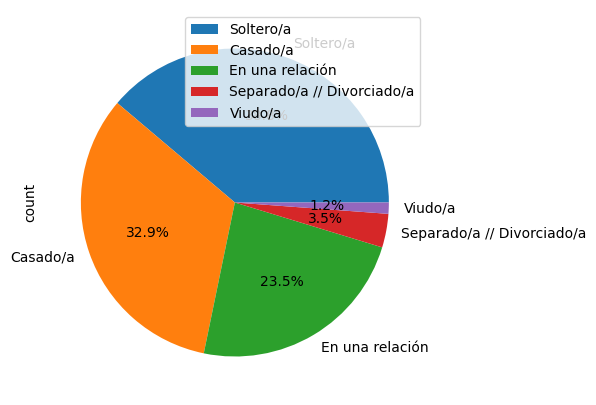

In [943]:
# PP_estado_civil_

# plot
print(encuesta['PP_estado_civil'].value_counts())
encuesta['PP_estado_civil'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_estado_civil']=="Soltero/a",'PP_estado_civil_soltero']=1
encuesta['PP_estado_civil_soltero']=encuesta['PP_estado_civil_soltero'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Casado/a",'PP_estado_civil_Casado']=1
encuesta['PP_estado_civil_Casado']=encuesta['PP_estado_civil_Casado'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="En una relación",'PP_estado_civil_relación']=1
encuesta['PP_estado_civil_relación']=encuesta['PP_estado_civil_relación'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Separado/a // Divorciado/a",'PP_estado_civil_separado']=1
encuesta['PP_estado_civil_separado']=encuesta['PP_estado_civil_separado'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_estado_civil']=="Viudo/a",'PP_estado_civil_viudo']=1
encuesta['PP_estado_civil_viudo']=encuesta['PP_estado_civil_viudo'].fillna(0).astype(int)

# Drop PP_estado_civil
encuesta.drop(['PP_estado_civil'], axis=1, inplace=True)
print("\n",encuesta.shape)

PP_convivencia
En familia             37
En pareja              15
Vivo con mis padres    11
Solo                   10
Con amigos              9
Otro                    2
Vivo en comunidad       1
Name: count, dtype: int64

 (85, 50)


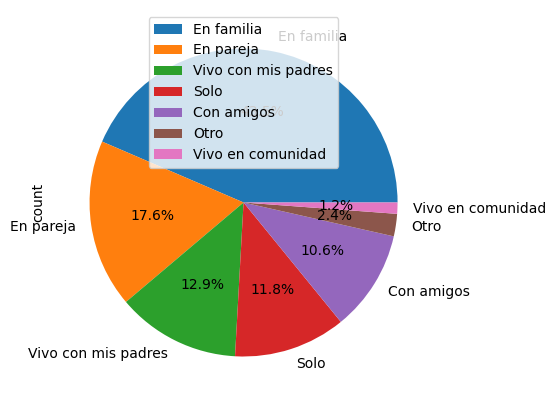

In [944]:
# PP_convivencia_

# plot
print(encuesta['PP_convivencia'].value_counts())
encuesta['PP_convivencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to binary
encuesta.loc[encuesta['PP_convivencia']=="En familia",'PP_convivencia_familia']=1
encuesta['PP_convivencia_familia']=encuesta['PP_convivencia_familia'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="En pareja",'PP_convivencia_pareja']=1
encuesta['PP_convivencia_pareja']=encuesta['PP_convivencia_pareja'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Solo",'PP_convivencia_solo']=1
encuesta['PP_convivencia_solo']=encuesta['PP_convivencia_solo'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Vivo con mis padres",'PP_convivencia_padres']=1
encuesta['PP_convivencia_padres']=encuesta['PP_convivencia_padres'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Con amigos",'PP_convivencia_amigos']=1
encuesta['PP_convivencia_amigos']=encuesta['PP_convivencia_amigos'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Otro",'PP_convivencia_otro']=1
encuesta['PP_convivencia_otro']=encuesta['PP_convivencia_otro'].fillna(0).astype(int)
encuesta.loc[encuesta['PP_convivencia']=="Vivo en comunidad",'PP_convivencia_comunidad']=1
encuesta['PP_convivencia_comunidad']=encuesta['PP_convivencia_comunidad'].fillna(0).astype(int)

# Drop PP_convivencia
encuesta.drop(['PP_convivencia'], axis=1, inplace=True)
print("\n",encuesta.shape)

### 1.1.2 PP_educación_, XX_nivel_formación, PP_ocupación_, XX_nivel_ocupación, PP_área_, PP_área2_, XX_interdisciplinariedad

(85, 59)


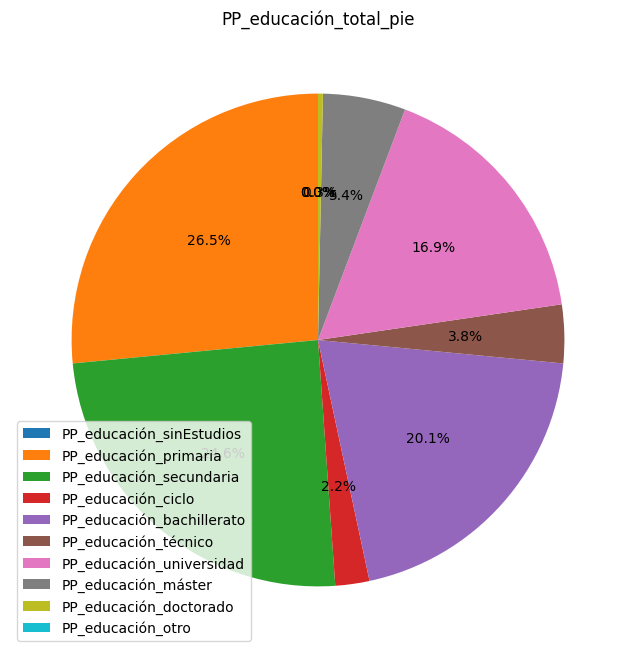

In [945]:
# PP_educación_

# processing
encuesta['PP_educaciónn']=encuesta['PP_educación']
encuesta.loc[encuesta['PP_educaciónn']=="Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Postgrado / Maestría",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria",'PP_educaciónn']="Primaria o menos;Secundaria"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Bachillerato / preparatoria;Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Doctorado",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría;Doctorado"
encuesta.loc[encuesta['PP_educaciónn']=="Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Secundaria;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Técnico/a // Formación profesional;Universitario/a (Grado)"
encuesta.loc[encuesta['PP_educaciónn']=="Ciclo formativo",'PP_educaciónn']="Primaria o menos;Ciclo formativo"
encuesta.loc[encuesta['PP_educaciónn']=="Ciclo formativo;Técnico/a // Formación profesional",'PP_educaciónn']="Primaria o menos;Ciclo formativo;Técnico/a // Formación profesional"
encuesta.loc[encuesta['PP_educaciónn']=="Universitario/a (Grado);Postgrado / Maestría",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado);Postgrado / Maestría"
encuesta.loc[encuesta['PP_educaciónn']=="Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)",'PP_educaciónn']="Primaria o menos;Secundaria;Bachillerato / preparatoria;Universitario/a (Grado)"

# replace PP_educación
encuesta.drop(['PP_educación'], axis=1, inplace=True)
encuesta.rename(columns={'PP_educaciónn':'PP_educación'}, inplace=True)

# to binary
encuesta.loc[encuesta['PP_educación'].str.contains('Sin estudios oficiales'),'PP_educación_sinEstudios'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Primaria o menos'),'PP_educación_primaria'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Secundaria'),'PP_educación_secundaria'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Ciclo formativo'),'PP_educación_ciclo'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Bachillerato / preparatoria'),'PP_educación_bachillerato'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Técnico/a // Formación profesional'),'PP_educación_técnico'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Universitario/a (Grado)', regex=False),'PP_educación_universidad'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Postgrado / Maestría'),'PP_educación_máster'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Doctorado'),'PP_educación_doctorado'] = 1
encuesta.loc[encuesta['PP_educación'].str.contains('Otro'),'PP_educación_otro'] = 1

# compile
encuesta.drop(['PP_educación'], axis=1, inplace=True)# Drop PP_educación
PP_educación=encuesta.filter(regex='^PP_educación').fillna(0)# Fill na
PP_educación = PP_educación.astype(int)# Change PP_educación to int
encuesta[PP_educación.columns] = PP_educación# Add PP_educación to encuesta
print(encuesta.shape)

# calcular XX_nivel_formación
encuesta['XX_nivel_formación']=(encuesta['PP_educación_sinEstudios']*0)+(encuesta['PP_educación_primaria']*1)+(encuesta['PP_educación_secundaria']*2)+(encuesta['PP_educación_ciclo']*2.5)+(encuesta['PP_educación_bachillerato']*3)+(encuesta['PP_educación_técnico']*3.5)+(encuesta['PP_educación_universidad']*4)+(encuesta['PP_educación_máster']*5)+(encuesta['PP_educación_doctorado']*6)+(encuesta['PP_educación_otro']*3)
# standardize to 0-1
encuesta['XX_nivel_formación'] = (encuesta['XX_nivel_formación']-encuesta['XX_nivel_formación'].min())/(encuesta['XX_nivel_formación'].max()-encuesta['XX_nivel_formación'].min())


# plot
PP_educación_total=PP_educación.T
PP_educación_total['total']=PP_educación_total.sum(axis=1)
PP_educación_total_pie=PP_educación_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_educación_total_pie',figsize=(8, 8))
plt.ylabel('')
plt.show()

(85, 66)


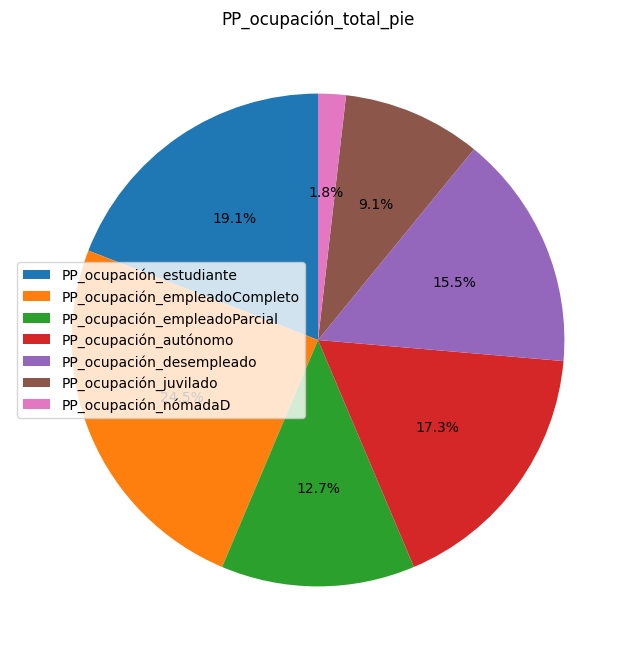

In [946]:
# PP_ocupación_

# processing
encuesta.loc[encuesta['PP_ocupación']=="Estudiante",'PP_ocupación']="Estudiante;Desempleado/a"

# to binary
encuesta.loc[encuesta['PP_ocupación'].str.contains('Estudiante'),'PP_ocupación_estudiante'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Empleado/a a tiempo completo'),'PP_ocupación_empleadoCompleto'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Empleado/a a tiempo parcial'),'PP_ocupación_empleadoParcial'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Autónomo/a'),'PP_ocupación_autónomo'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Desempleado/a'),'PP_ocupación_desempleado'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Jubilado/a'),'PP_ocupación_juvilado'] = 1
encuesta.loc[encuesta['PP_ocupación'].str.contains('Nómada digital'),'PP_ocupación_nómadaD'] = 1

# compile
encuesta.drop(['PP_ocupación'], axis=1, inplace=True)# Drop PP_ocupación
PP_ocupación=encuesta.filter(regex='^PP_ocupación').fillna(0)# Fill na
PP_ocupación = PP_ocupación.astype(int)# Change PP_ocupación to int
encuesta[PP_ocupación.columns] = PP_ocupación# Add PP_ocupación to encuesta
print(encuesta.shape)

# calcular XX_nivel_ocupación
encuesta['XX_nivel_ocupación']=(encuesta['PP_ocupación_juvilado']*0.5)+(encuesta['PP_ocupación_desempleado']*1)+(encuesta['PP_ocupación_empleadoParcial']*2)+(encuesta['PP_ocupación_estudiante']*3)+(encuesta['PP_ocupación_nómadaD']*3.5)+(encuesta['PP_ocupación_autónomo']*4)+(encuesta['PP_ocupación_empleadoCompleto']*4)
# standardize to 0-1
encuesta['XX_nivel_ocupación'] = (encuesta['XX_nivel_ocupación']-encuesta['XX_nivel_ocupación'].min())/(encuesta['XX_nivel_ocupación'].max()-encuesta['XX_nivel_ocupación'].min())


# plot
PP_ocupación_total=PP_ocupación.T
PP_ocupación_total['total']=PP_ocupación_total.sum(axis=1)
PP_ocupación_total_pie=PP_ocupación_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_ocupación_total_pie',figsize=(8, 8))
plt.ylabel('')
plt.show()

(85, 93)


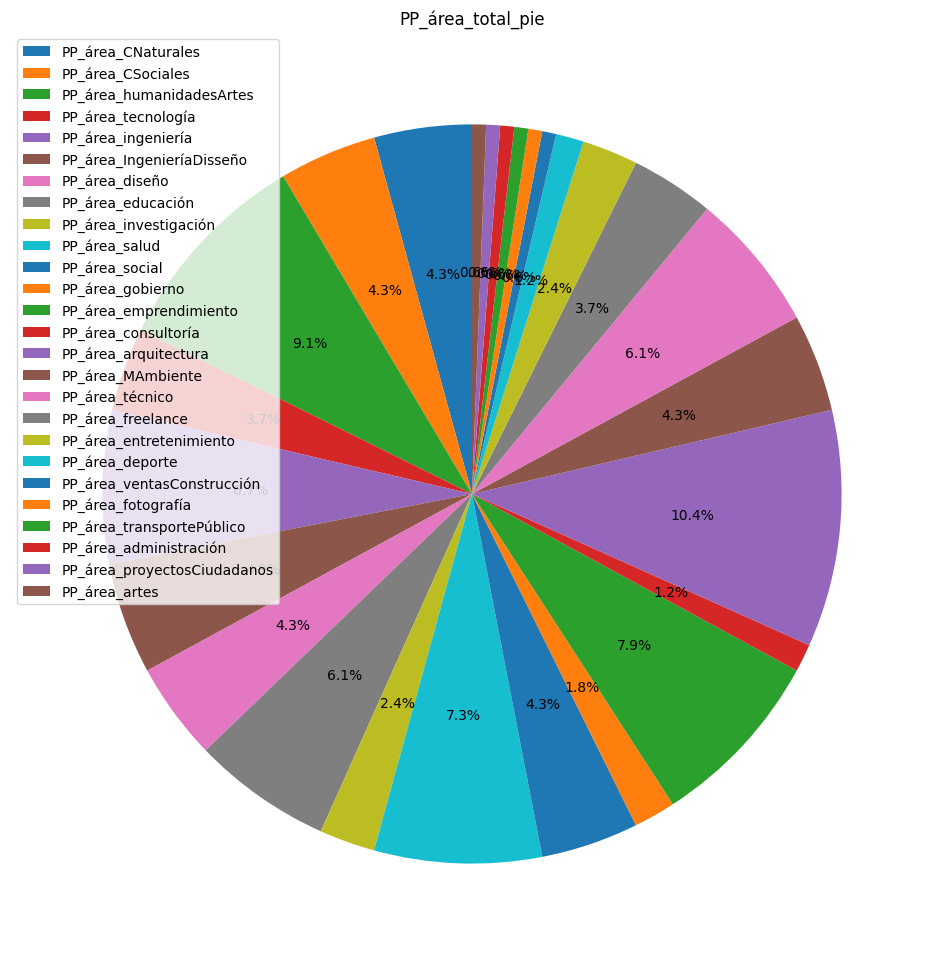

In [947]:
# PP_área_

# to binary
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias naturales'),'PP_área_CNaturales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias sociales'),'PP_área_CSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Humanidades y artes'),'PP_área_humanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Tecnología y computación'),'PP_área_tecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería'),'PP_área_ingeniería'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería y diseño'),'PP_área_IngenieríaDisseño'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Diseño'),'PP_área_diseño'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Educación y pedagogía'),'PP_área_educación'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Investigación y academia'),'PP_área_investigación'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Salud y medicina'),'PP_área_salud'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Servicios sociales y asistenciales'),'PP_área_social'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Gobierno y servicio público'),'PP_área_gobierno'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Negocios, administración empresarial, emprendimiento y márquetin'),'PP_área_emprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Consultoría y análisis'),'PP_área_consultoría'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Arquitectura'),'PP_área_arquitectura'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Agricultura y medio ambiente'),'PP_área_MAmbiente'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Técnico / oficios'),'PP_área_técnico'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Carrera independiente / Freelance'),'PP_área_freelance'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Entretenimiento, medios de comunicación y relaciones públicas'),'PP_área_entretenimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Deporte y actividad física'),'PP_área_deporte'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ventas Construccion'),'PP_área_ventasConstrucción'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Fotografia'),'PP_área_fotografía'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Transporte público'),'PP_área_transportePúblico'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Administracion'),'PP_área_administración'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Mediación de proyectos ciudadanos'),'PP_área_proyectosCiudadanos'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Artes y creatividad.'),'PP_área_artes'] = 1

# compile
PP_área=encuesta.filter(regex='^PP_área').fillna(0)# Fill na
PP_área.drop(['PP_área'], axis=1, inplace=True)# Drop PP_área in PP_área group
PP_área = PP_área.astype(int)# Change PP_área to int
encuesta[PP_área.columns] = PP_área# Add PP_área to encuesta
print(encuesta.shape)

# interdisciplinariedad
encuesta['XX_interdisciplinariedad'] = PP_área.sum(axis=1)

# plot
PP_área_total=PP_área.T
PP_área_total['total']=PP_área_total.sum(axis=1)
PP_área_total_pie=PP_área_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_área_total_pie',figsize=(12, 12))
plt.ylabel('')
plt.show()

(85, 97)


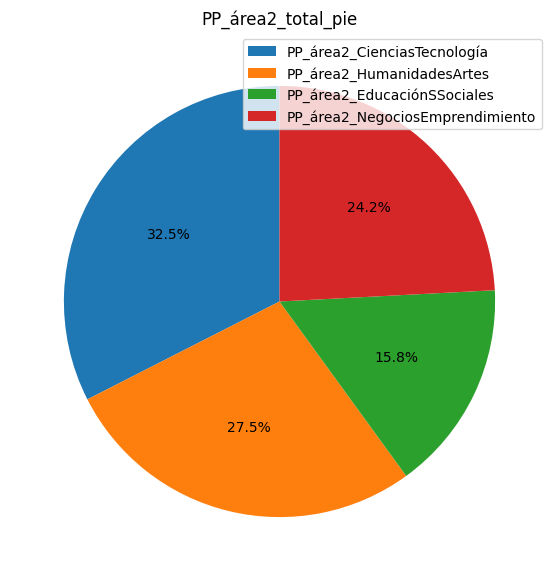

In [948]:
# PP_área2_

# to binary
# PP_área2_CienciasTecnología
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias naturales'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ciencias sociales'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Tecnología y computación'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ingeniería y diseño'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Salud y medicina'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Investigación y academia'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Agricultura y medio ambiente'),'PP_área2_CienciasTecnología'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Deporte y actividad física'),'PP_área2_CienciasTecnología'] = 1

# PP_área2_HumanidadesArtes
encuesta.loc[encuesta['PP_área'].str.contains('Humanidades y artes'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Diseño'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Arquitectura'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Entretenimiento, medios de comunicación y relaciones públicas'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Artes y creatividad.'),'PP_área2_HumanidadesArtes'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Fotografia'),'PP_área2_HumanidadesArtes'] = 1

# PP_área2_EducaciónSSociales
encuesta.loc[encuesta['PP_área'].str.contains('Educación y pedagogía'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Servicios sociales y asistenciales'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Gobierno y servicio público'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Transporte público'),'PP_área2_EducaciónSSociales'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Mediación de proyectos ciudadanos'),'PP_área2_EducaciónSSociales'] = 1

# PP_área2_NegociosEmprendimiento
encuesta.loc[encuesta['PP_área'].str.contains('Negocios, administración empresarial, emprendimiento y márquetin'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Consultoría y análisis'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Técnico / oficios'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Carrera independiente / Freelance'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Ventas Construccion'),'PP_área2_NegociosEmprendimiento'] = 1
encuesta.loc[encuesta['PP_área'].str.contains('Administracion'),'PP_área2_NegociosEmprendimiento'] = 1

# compile
encuesta.drop(['PP_área'], axis=1, inplace=True)# Drop PP_área
PP_área2=encuesta.filter(regex='^PP_área2').fillna(0)# Fill na
PP_área2 = PP_área2.astype(int)# Change PP_área2 to int
encuesta[PP_área2.columns] = PP_área2# Add PP_área2 to encuesta
print(encuesta.shape)

# XX_interdisciplinariedad
encuesta['XX_interdisciplinariedad2'] = PP_área2.sum(axis=1)
encuesta['XX_interdisciplinariedad3']=encuesta['XX_interdisciplinariedad']+encuesta['XX_interdisciplinariedad2']
encuesta.drop(['XX_interdisciplinariedad', 'XX_interdisciplinariedad2'], axis=1, inplace=True)# Drop XX_interdisciplinariedad
encuesta.rename(columns={'XX_interdisciplinariedad3':'XX_interdisciplinariedad'}, inplace=True)
encuesta.loc[encuesta['XX_interdisciplinariedad']>10,'XX_interdisciplinariedad']=10
# standardize to 0-1
encuesta['XX_interdisciplinariedad'] = (encuesta['XX_interdisciplinariedad']-encuesta['XX_interdisciplinariedad'].min())/(encuesta['XX_interdisciplinariedad'].max()-encuesta['XX_interdisciplinariedad'].min())


# plot
PP_área2_total=PP_área2.T
PP_área2_total['total']=PP_área2_total.sum(axis=1)
PP_área2_total_pie=PP_área2_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_área2_total_pie',figsize=(7, 7))
plt.ylabel('')
plt.show()

### 1.1.3 PP_dónde_vives_, PP_zona_, XX_PP_tiempo_residencia

(85, 100)


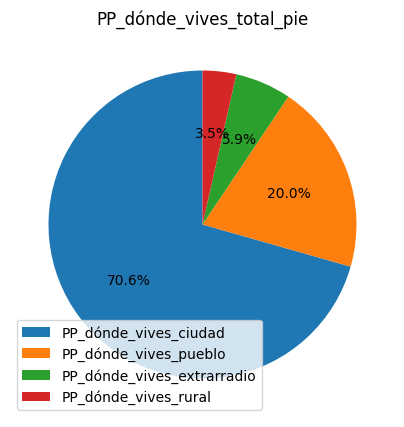

In [949]:
# PP_dónde_vives

# Change PP_dónde_vives to binary
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Ciudad'),'PP_dónde_vives_ciudad'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Pueblo'),'PP_dónde_vives_pueblo'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Extrarradio de ciudad'),'PP_dónde_vives_extrarradio'] = 1
encuesta.loc[encuesta['PP_dónde_vives'].str.contains('Zona rural'),'PP_dónde_vives_rural'] = 1

# compile
encuesta.drop(['PP_dónde_vives'], axis=1, inplace=True)# Drop PP_dónde_vives
PP_dónde_vives=encuesta.filter(regex='^PP_dónde_vives').fillna(0)# Fill na
PP_dónde_vives = PP_dónde_vives.astype(int)# Change PP_dónde_vives to int
encuesta[PP_dónde_vives.columns] = PP_dónde_vives# Add PP_dónde_vives to encuesta
print(encuesta.shape)

# plot
PP_dónde_vives=encuesta.filter(regex="^PP_dónde_vives")
PP_dónde_vives_total=PP_dónde_vives.T
PP_dónde_vives_total['total']=PP_dónde_vives_total.sum(axis=1)
PP_dónde_vives_total_pie=PP_dónde_vives_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_dónde_vives_total_pie',figsize=(5,5))
plt.ylabel('')
plt.show()

(85, 108)


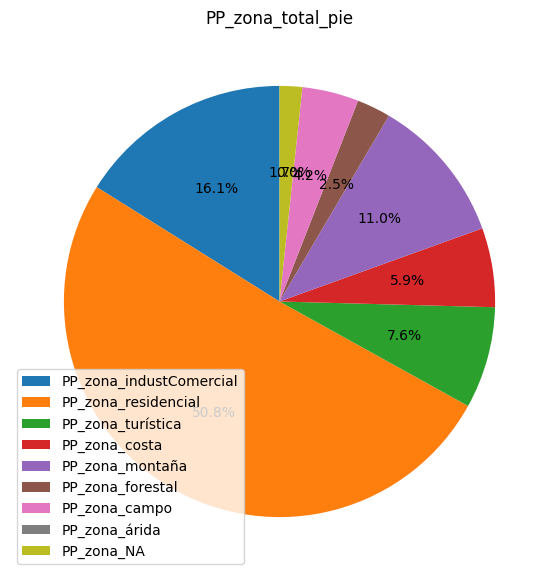

In [950]:
# PP_zona_

# Change PP_zona to binary
encuesta.loc[encuesta['PP_zona'].str.contains('Zona industrial o comercial'),'PP_zona_industComercial'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona residencial'),'PP_zona_residencial'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona turística'),'PP_zona_turística'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona costera'),'PP_zona_costa'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona de montaña'),'PP_zona_montaña'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona forestal'),'PP_zona_forestal'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona de campo'),'PP_zona_campo'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('Zona árida'),'PP_zona_árida'] = 1
encuesta.loc[encuesta['PP_zona'].str.contains('No estoy seguro/No aplica'),'PP_zona_NA'] = 1

# compile
encuesta.drop(['PP_zona'], axis=1, inplace=True)# Drop PP_zona
PP_zona=encuesta.filter(regex='^PP_zona').fillna(0)# Fill na
PP_zona = PP_zona.astype(int)# Change PP_zona to int
encuesta[PP_zona.columns] = PP_zona# Add PP_zona to encuesta
print(encuesta.shape)

# plot
PP_zona=encuesta.filter(regex="^PP_zona")
PP_zona_total=PP_zona.T
PP_zona_total['total']=PP_zona_total.sum(axis=1)
PP_zona_total_pie=PP_zona_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_zona_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

PP_tiempo_residencia
Más de 10 años    37
1-5 años          29
6-10 años         11
Menos de 1 año     8
Name: count, dtype: int64

 (85, 108)


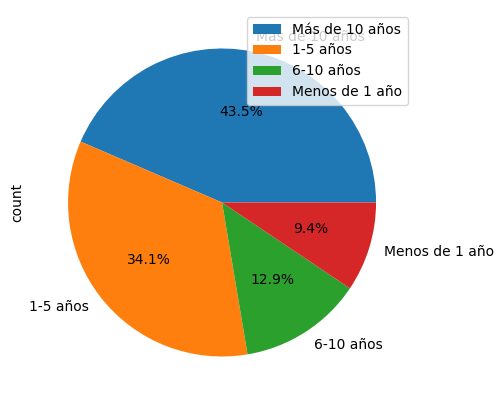

In [951]:
# XX_PP_tiempo_residencia

# plot
print(encuesta['PP_tiempo_residencia'].value_counts())
encuesta['PP_tiempo_residencia'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to categorical
encuesta.loc[encuesta['PP_tiempo_residencia']=="Menos de 1 año",'PP_tiempo_residenciaa']=0
encuesta.loc[encuesta['PP_tiempo_residencia']=="1-5 años",'PP_tiempo_residenciaa']=1/3
encuesta.loc[encuesta['PP_tiempo_residencia']=="6-10 años",'PP_tiempo_residenciaa']=2/3
encuesta.loc[encuesta['PP_tiempo_residencia']=="Más de 10 años",'PP_tiempo_residenciaa']=1

# Drop PP_edad
encuesta.drop(['PP_tiempo_residencia'], axis=1, inplace=True)
encuesta.rename(columns={'PP_tiempo_residenciaa':'XX_PP_tiempo_residencia'}, inplace=True)
print("\n",encuesta.shape)

### 1.1.4 PP_sobre_ti_

(85, 134)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3952698581.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PP_sobre_ti'].str.contains('No estoy satisfecho si no he aprovechado el día'),'PP_sobre_ti_provechoso'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3952698581.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Antes playa que montaña'),'PP_sobre_ti_playa'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3952698581.py:24: Perfo

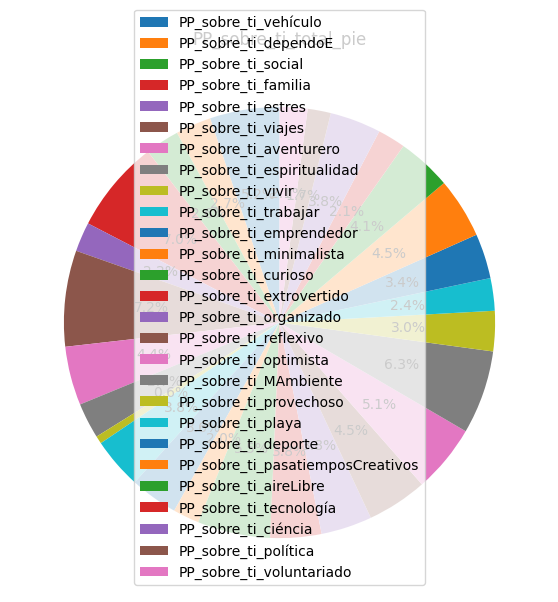

In [952]:
# PP_sobre_ti__

# Change PP_sobre_ti to binary
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Tengo o dispongo de vehículo de transporte'),'PP_sobre_ti_vehículo'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Dependo económicamente de alguien'),'PP_sobre_ti_dependoE'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Le doy mucha importancia a las actividades sociales'),'PP_sobre_ti_social'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('La familia como parte fundamental en mi vida'),'PP_sobre_ti_familia'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me estreso fácilmente'),'PP_sobre_ti_estres'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Tengo interés en viajar'),'PP_sobre_ti_viajes'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero aventurero / intrépido y disfruto de experiencias emocionantes'),'PP_sobre_ti_aventurero'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('La espiritualidad o religión desempeñan un papel importante en mi vida'),'PP_sobre_ti_espiritualidad'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Vivir para trabajar'),'PP_sobre_ti_vivir'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Trabajar para vivir'),'PP_sobre_ti_trabajar'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Mentalidad emprendedora'),'PP_sobre_ti_emprendedor'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero minimalista en mi estilo de vida'),'PP_sobre_ti_minimalista'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Mente curiosa'),'PP_sobre_ti_curioso'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy extrovertido'),'PP_sobre_ti_extrovertido'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy meticuloso y organizado'),'PP_sobre_ti_organizado'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Soy una persona reflexiva / filosófica'),'PP_sobre_ti_reflexivo'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me considero optimista'),'PP_sobre_ti_optimista'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Me preocupa el medio ambiente'),'PP_sobre_ti_MAmbiente'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('No estoy satisfecho si no he aprovechado el día'),'PP_sobre_ti_provechoso'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Antes playa que montaña'),'PP_sobre_ti_playa'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Practico deporte regularmente'),'PP_sobre_ti_deporte'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Disfruto de pasatiempos creativos (pintura, escritura, música, etc.)', regex=False),'PP_sobre_ti_pasatiemposCreativos'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Aficiones al aire libre (senderismo, camping, etc.)', regex=False),'PP_sobre_ti_aireLibre'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Afición a la tecnología'),'PP_sobre_ti_tecnología'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Interés en la ciencia'),'PP_sobre_ti_ciéncia'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Interés en la política'),'PP_sobre_ti_política'] = 1
encuesta.loc[encuesta['PP_sobre_ti'].str.contains('Participo en actividades de voluntariado o trabajo social'),'PP_sobre_ti_voluntariado'] = 1

# compile
encuesta.drop(['PP_sobre_ti'], axis=1, inplace=True)# Drop PP_sobre_ti
PP_sobre_ti=encuesta.filter(regex='^PP_sobre_ti').fillna(0)# Fill na
PP_sobre_ti = PP_sobre_ti.astype(int)# Change PP_sobre_ti to int
encuesta[PP_sobre_ti.columns] = PP_sobre_ti# Add PP_sobre_ti to encuesta
print(encuesta.shape)

# plot
PP_sobre_ti=encuesta.filter(regex="^PP_sobre_ti")
PP_sobre_ti_total=PP_sobre_ti.T
PP_sobre_ti_total['total']=PP_sobre_ti_total.sum(axis=1)
PP_sobre_ti_total_pie=PP_sobre_ti_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PP_sobre_ti_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

## 1.2 IND (Individualidad-colectivismo): IND_individ_colect_, IND_proyectosEquipo, XX_IND_conflicto, XX_IND_trabajo_equipo, XX_IND_act_comunitarias, XX_IND_ratioColectivismo

(85, 145)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3272089401.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me gusta asumir responsabilidades y liderar proyectos'),'IND_individ_colect_liderar'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3272089401.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero roles de liderazgo en proyectos.'),'IND_individ_colect_liderar2'] = 1
C:\Users\xavie\AppData\

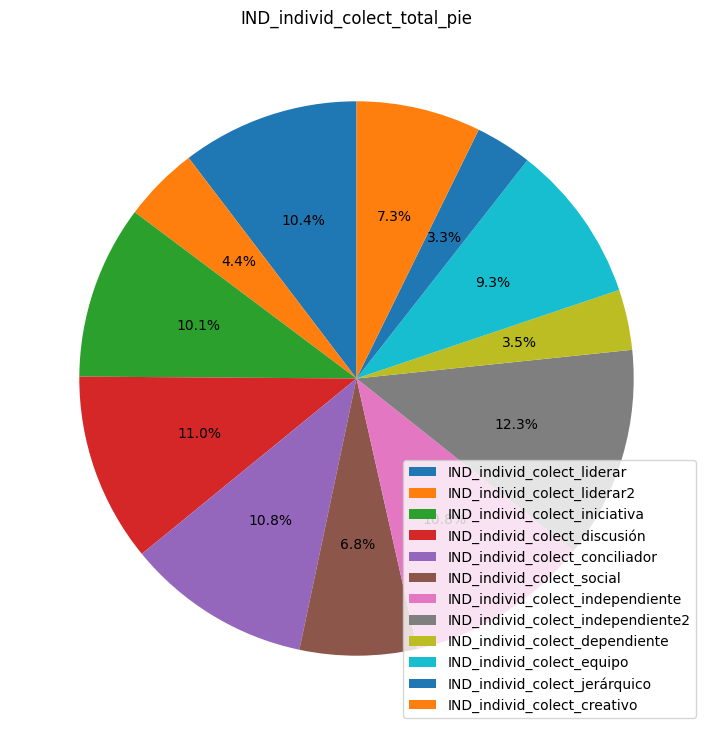

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3272089401.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['IND_ratioColectivismo']=encuesta['IND_individ_colect_liderar']*-1+encuesta['IND_individ_colect_liderar2']*-1+encuesta['IND_individ_colect_iniciativa']*-1+encuesta['IND_individ_colect_discusión']*1+encuesta['IND_individ_colect_conciliador']*1+encuesta['IND_individ_colect_social']*1+encuesta['IND_individ_colect_independiente']*-1+encuesta['IND_individ_colect_independiente2']*-1+encuesta['IND_individ_colect_dependiente']*1+encuesta['IND_individ_colect_equipo']*1+encuesta['IND_individ_colect_jerárquico']*1+encuesta['IND_individ_colect_creativo']*-1


In [953]:
# IND_individ_colect_

# Change IND_individ_colect to binary
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me gusta asumir responsabilidades y liderar proyectos'),'IND_individ_colect_liderar'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero roles de liderazgo en proyectos.'),'IND_individ_colect_liderar2'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Tengo iniciativa y tomo la delantera en las tareas'),'IND_individ_colect_iniciativa'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Soy comunicativo y disfruto en conversaciones y discusiones'),'IND_individ_colect_discusión'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Soy conciliador y trato de resolver conflictos de manera pacífica'),'IND_individ_colect_conciliador'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Mantengo una amplia red de amigos y conexiones sociales'),'IND_individ_colect_social'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Valorizo tener criterio propio y tomar decisiones independientes'),'IND_individ_colect_independiente'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Disfruto de la autonomía en mi trabajo.'),'IND_individ_colect_independiente2'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Prefiero seguir las directrices de otros cuando no me siento seguro de manejar una situación'),'IND_individ_colect_dependiente'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me siento cómodo trabajando en grupos grandes y colaborando en proyectos de equipo'),'IND_individ_colect_equipo'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Trabajo mejor en un entorno estructurado y jerárquico'),'IND_individ_colect_jerárquico'] = 1
encuesta.loc[encuesta['IND_individ_colect'].str.contains('Me considero un solucionador de problemas creativo.'),'IND_individ_colect_creativo'] = 1

# compile
encuesta.drop(['IND_individ_colect'], axis=1, inplace=True)# Drop IND_individ_colect
IND_individ_colect=encuesta.filter(regex='^IND_individ_colect').fillna(0)# Fill na
IND_individ_colect = IND_individ_colect.astype(int)# Change IND_individ_colect to int
encuesta[IND_individ_colect.columns] = IND_individ_colect# Add IND_individ_colect to encuesta
print(encuesta.shape)

# plot
IND_individ_colect=encuesta.filter(regex="^IND_individ_colect")
IND_individ_colect_total=IND_individ_colect.T
IND_individ_colect_total['total']=IND_individ_colect_total.sum(axis=1)
IND_individ_colect_total_pie=IND_individ_colect_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='IND_individ_colect_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

# IND_individ_colect
encuesta['IND_ratioColectivismo']=encuesta['IND_individ_colect_liderar']*-1+encuesta['IND_individ_colect_liderar2']*-1+encuesta['IND_individ_colect_iniciativa']*-1+encuesta['IND_individ_colect_discusión']*1+encuesta['IND_individ_colect_conciliador']*1+encuesta['IND_individ_colect_social']*1+encuesta['IND_individ_colect_independiente']*-1+encuesta['IND_individ_colect_independiente2']*-1+encuesta['IND_individ_colect_dependiente']*1+encuesta['IND_individ_colect_equipo']*1+encuesta['IND_individ_colect_jerárquico']*1+encuesta['IND_individ_colect_creativo']*-1

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3497413139.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_proyectos']=="Proyectos que involucran colaboración y trabajo en equipo.",'IND_proyectos_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3497413139.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_proyectosEquipo']==1,'IND_ratioColectivismo2'] = 3


IND_proyectos
Proyectos que involucran colaboración y trabajo en equipo.     50
Proyectos que te permiten trabajar de manera independiente.    35
Name: count, dtype: int64

 (85, 146)


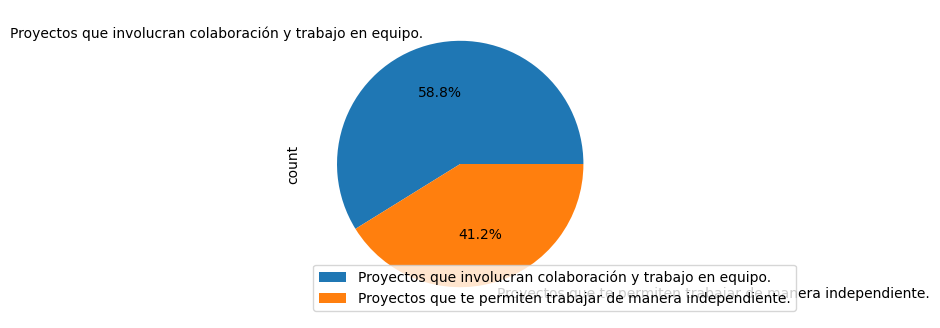

In [954]:
# IND_proyectosEquipo

# plot
print(encuesta['IND_proyectos'].value_counts())
encuesta['IND_proyectos'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['IND_proyectos']=="Proyectos que involucran colaboración y trabajo en equipo.",'IND_proyectos_']=1
encuesta['IND_proyectos_']=encuesta['IND_proyectos_'].fillna(0).astype(int)

# Drop IND_proyectos
encuesta.drop(['IND_proyectos'], axis=1, inplace=True)
encuesta.rename(columns={'IND_proyectos_':'IND_proyectosEquipo'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo2
encuesta.loc[encuesta['IND_proyectosEquipo']==1,'IND_ratioColectivismo2'] = 3
encuesta.loc[encuesta['IND_proyectosEquipo']==0,'IND_ratioColectivismo2'] = -3

IND_conflicto
Sí, siempre busco soluciones mutuamente beneficiosas.    64
A veces, dependiendo de la situación.                    21
Name: count, dtype: int64

 (85, 147)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1049448535.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_conflicto']=="No, generalmente busco ganar la disputa.",'IND_conflicto_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1049448535.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_conflicto']==1,'IND_ratioColectivismo3'] = 3


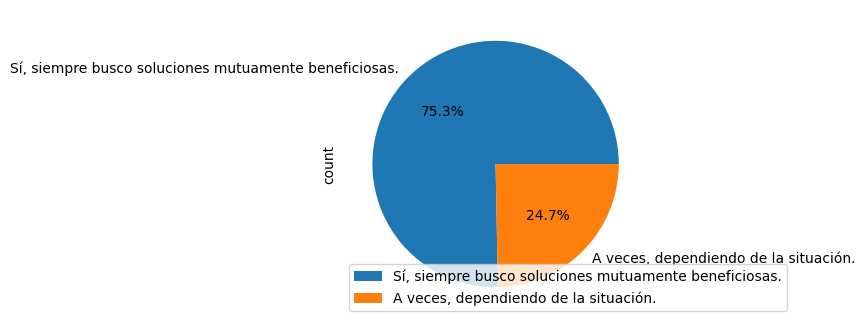

In [955]:
# XX_IND_conflicto

# plot
print(encuesta['IND_conflicto'].value_counts())
encuesta['IND_conflicto'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_conflicto']=="No, generalmente busco ganar la disputa.",'IND_conflicto_']=0
encuesta.loc[encuesta['IND_conflicto']=="A veces, dependiendo de la situación.",'IND_conflicto_']=0.5
encuesta.loc[encuesta['IND_conflicto']=="Sí, siempre busco soluciones mutuamente beneficiosas.",'IND_conflicto_']=1

# Drop IND_conflicto
encuesta.drop(['IND_conflicto'], axis=1, inplace=True)
encuesta.rename(columns={'IND_conflicto_':'XX_IND_conflicto'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo3
encuesta.loc[encuesta['XX_IND_conflicto']==1,'IND_ratioColectivismo3'] = 3
encuesta.loc[encuesta['XX_IND_conflicto']==0.5,'IND_ratioColectivismo3'] = 0
encuesta.loc[encuesta['XX_IND_conflicto']==0,'IND_ratioColectivismo3'] = -3

IND_trabajo_equipo
A menudo     56
Siempre      26
Raramente     3
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1324814273.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_trabajo_equipo']=="Nunca",'IND_trabajo_equipo_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1324814273.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_trabajo_equipo']==0,'IND_ratioColectivismo4'] = -3



 (85, 148)


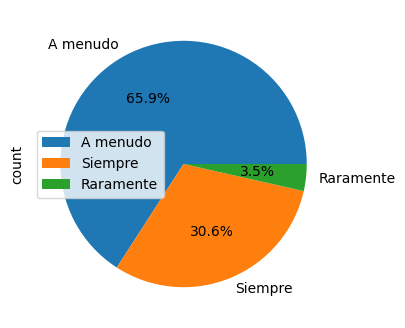

In [956]:
# XX_IND_trabajo_equipo

# plot
print(encuesta['IND_trabajo_equipo'].value_counts())
encuesta['IND_trabajo_equipo'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_trabajo_equipo']=="Nunca",'IND_trabajo_equipo_']=0
encuesta.loc[encuesta['IND_trabajo_equipo']=="Raramente",'IND_trabajo_equipo_']=1/3
encuesta.loc[encuesta['IND_trabajo_equipo']=="A menudo",'IND_trabajo_equipo_']=2/3
encuesta.loc[encuesta['IND_trabajo_equipo']=="Siempre",'IND_trabajo_equipo_']=1

# Drop IND_trabajo_equipo
encuesta.drop(['IND_trabajo_equipo'], axis=1, inplace=True)
encuesta.rename(columns={'IND_trabajo_equipo_':'XX_IND_trabajo_equipo'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo4
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==0,'IND_ratioColectivismo4'] = -3
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==1/3,'IND_ratioColectivismo4'] = -2
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==2/3,'IND_ratioColectivismo4'] = 2
encuesta.loc[encuesta['XX_IND_trabajo_equipo']==1,'IND_ratioColectivismo4'] = 3

IND_act_comunitarias
Raramente    39
A menudo     21
Nunca        15
Siempre      10
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3824557154.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['IND_act_comunitarias']=="Nunca",'IND_act_comunitarias_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3824557154.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_IND_act_comunitarias']==0,'IND_ratioColectivismo5'] = -3



 (85, 149)


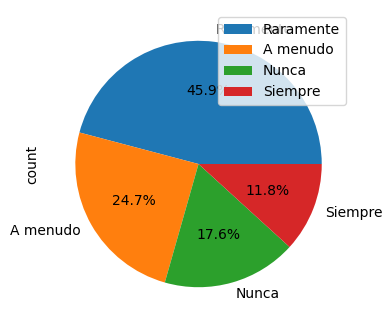

In [957]:
# XX_IND_act_comunitarias

# plot
print(encuesta['IND_act_comunitarias'].value_counts())
encuesta['IND_act_comunitarias'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['IND_act_comunitarias']=="Nunca",'IND_act_comunitarias_']=0
encuesta.loc[encuesta['IND_act_comunitarias']=="Raramente",'IND_act_comunitarias_']=1/3
encuesta.loc[encuesta['IND_act_comunitarias']=="A menudo",'IND_act_comunitarias_']=2/3
encuesta.loc[encuesta['IND_act_comunitarias']=="Siempre",'IND_act_comunitarias_']=1

# Drop IND_act_comunitarias
encuesta.drop(['IND_act_comunitarias'], axis=1, inplace=True)
encuesta.rename(columns={'IND_act_comunitarias_':'XX_IND_act_comunitarias'}, inplace=True)
print("\n",encuesta.shape)

# IND_ratioColectivismo5
encuesta.loc[encuesta['XX_IND_act_comunitarias']==0,'IND_ratioColectivismo5'] = -3
encuesta.loc[encuesta['XX_IND_act_comunitarias']==1/3,'IND_ratioColectivismo5'] = 1
encuesta.loc[encuesta['XX_IND_act_comunitarias']==2/3,'IND_ratioColectivismo5'] = 2
encuesta.loc[encuesta['XX_IND_act_comunitarias']==1,'IND_ratioColectivismo5'] = 3

In [958]:
# XX_IND_ratioColectivismo

encuesta['IND_ratioColectivismoo']=encuesta['IND_ratioColectivismo']+encuesta['IND_ratioColectivismo2']+encuesta['IND_ratioColectivismo3']+encuesta['IND_ratioColectivismo4']+encuesta['IND_ratioColectivismo5']
encuesta.drop(['IND_ratioColectivismo', 'IND_ratioColectivismo2', 'IND_ratioColectivismo3', 'IND_ratioColectivismo4', 'IND_ratioColectivismo5'], axis=1, inplace=True)
encuesta.rename(columns={'IND_ratioColectivismoo':'XX_IND_ratioColectivismo'}, inplace=True)

# standarize to 0-1
encuesta['XX_IND_ratioColectivismo'] = (encuesta['XX_IND_ratioColectivismo']-encuesta['XX_IND_ratioColectivismo'].min())/(encuesta['XX_IND_ratioColectivismo'].max()-encuesta['XX_IND_ratioColectivismo'].min())
print(encuesta.shape)

(85, 146)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1177412996.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['IND_ratioColectivismoo']=encuesta['IND_ratioColectivismo']+encuesta['IND_ratioColectivismo2']+encuesta['IND_ratioColectivismo3']+encuesta['IND_ratioColectivismo4']+encuesta['IND_ratioColectivismo5']


## 1.3 PUE (Pueblo-ciudad): PUE_preferencias_entorno_, XX_PUE_rural_ciudad, PUE_rural_ciudad2, XX_PUE_aire_libre, PUE_trabajos_agrícolas, XX_PUE_alimmentación, XX_PUE_ciudad_urbano, XX_PUE_cultural_ciudad, PUE_ciudad_siempre, XX_PUE_ratioPueblo

(85, 160)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\4222037974.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me siento en paz en espacios naturales como bosques o campos.'),'PUE_preferencias_entorno_naturalezaPaz'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\4222037974.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de las opciones culturales y de entretenimiento que ofrece la

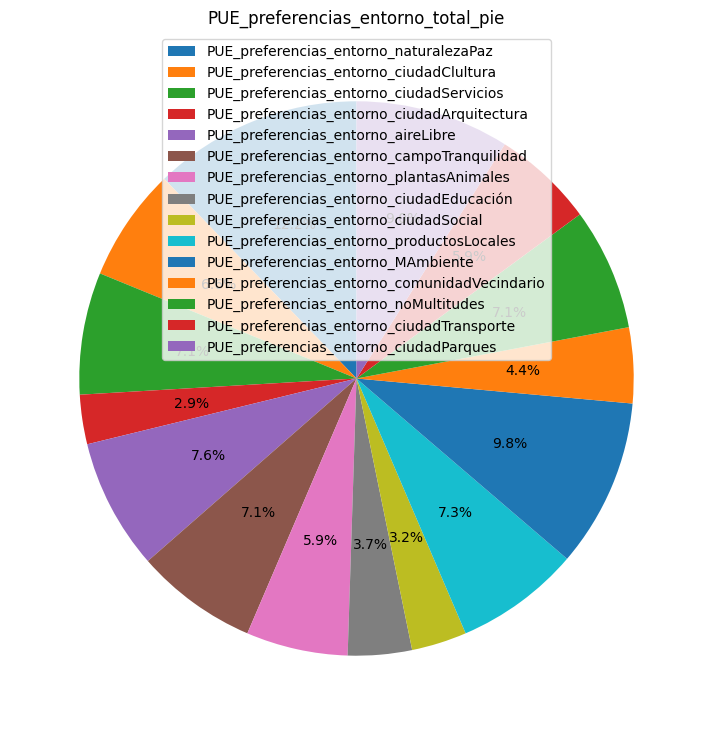

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\4222037974.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['PUE_ratioPueblo']=encuesta['PUE_preferencias_entorno_naturalezaPaz']*1+encuesta['PUE_preferencias_entorno_ciudadClultura']*-1+encuesta['PUE_preferencias_entorno_ciudadServicios']*-1+encuesta['PUE_preferencias_entorno_ciudadArquitectura']*-1+encuesta['PUE_preferencias_entorno_aireLibre']*1+encuesta['PUE_preferencias_entorno_campoTranquilidad']*1+encuesta['PUE_preferencias_entorno_plantasAnimales']*1+encuesta['PUE_preferencias_entorno_ciudadEducación']*-1+encuesta['PUE_preferencias_entorno_ciudadSocial']*-1+encuesta['PUE_preferencias_entorno_productosLocales']*1+encuesta['PUE_preferencias_entorno_MAmbiente']*1+encuesta['PUE_preferencias_

In [959]:
# PUE_preferencias_entorno_

# Change PUE_preferencias_entorno to binary
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me siento en paz en espacios naturales como bosques o campos.'),'PUE_preferencias_entorno_naturalezaPaz'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de las opciones culturales y de entretenimiento que ofrece la vida en la ciudad.'),'PUE_preferencias_entorno_ciudadClultura'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valorizo la comodidad de tener acceso a tiendas y servicios cercanos.'),'PUE_preferencias_entorno_ciudadServicios'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Encuentro inspiración en la arquitectura urbana y la vida en la ciudad.'),'PUE_preferencias_entorno_ciudadArquitectura'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Disfruto de actividades al aire libre como senderismo o campamentos.'),'PUE_preferencias_entorno_aireLibre'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Prefiero la tranquilidad del campo a la vida en la ciudad.'),'PUE_preferencias_entorno_campoTranquilidad'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me gusta trabajar en el jardín y cuidar de las plantas y animales.'),'PUE_preferencias_entorno_plantasAnimales'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valorizo las oportunidades de carrera y educación en áreas urbanas.'),'PUE_preferencias_entorno_ciudadEducación'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me emociona la idea de conocer gente nueva constantemente.'),'PUE_preferencias_entorno_ciudadSocial'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Prefiero los productos agrícolas frescos y locales.'),'PUE_preferencias_entorno_productosLocales'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Me preocupa el impacto ambiental.'),'PUE_preferencias_entorno_MAmbiente'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la comunidad y la colaboración en mi vecindario.'),'PUE_preferencias_entorno_comunidadVecindario'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('No me gustan las multitudes.'),'PUE_preferencias_entorno_noMultitudes'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la accesibilidad de los medios de transporte en la ciudad.'),'PUE_preferencias_entorno_ciudadTransporte'] = 1
encuesta.loc[encuesta['PUE_preferencias_entorno'].str.contains('Valoro la proximidad a parques y espacios verdes en la ciudad:'),'PUE_preferencias_entorno_ciudadParques'] = 1

# compile
encuesta.drop(['PUE_preferencias_entorno'], axis=1, inplace=True)# Drop PUE_preferencias_entorno
PUE_preferencias_entorno=encuesta.filter(regex='^PUE_preferencias_entorno').fillna(0)# Fill na
PUE_preferencias_entorno = PUE_preferencias_entorno.astype(int)# Change PUE_preferencias_entorno to int
encuesta[PUE_preferencias_entorno.columns] = PUE_preferencias_entorno# Add PUE_preferencias_entorno to encuesta
print(encuesta.shape)

# plot
PUE_preferencias_entorno_total=PUE_preferencias_entorno.T
PUE_preferencias_entorno_total['total']=PUE_preferencias_entorno_total.sum(axis=1)
PUE_preferencias_entorno_total_pie=PUE_preferencias_entorno_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='PUE_preferencias_entorno_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

# PUE_ratioPueblo
encuesta['PUE_ratioPueblo']=encuesta['PUE_preferencias_entorno_naturalezaPaz']*1+encuesta['PUE_preferencias_entorno_ciudadClultura']*-1+encuesta['PUE_preferencias_entorno_ciudadServicios']*-1+encuesta['PUE_preferencias_entorno_ciudadArquitectura']*-1+encuesta['PUE_preferencias_entorno_aireLibre']*1+encuesta['PUE_preferencias_entorno_campoTranquilidad']*1+encuesta['PUE_preferencias_entorno_plantasAnimales']*1+encuesta['PUE_preferencias_entorno_ciudadEducación']*-1+encuesta['PUE_preferencias_entorno_ciudadSocial']*-1+encuesta['PUE_preferencias_entorno_productosLocales']*1+encuesta['PUE_preferencias_entorno_MAmbiente']*1+encuesta['PUE_preferencias_entorno_comunidadVecindario']*0.5+encuesta['PUE_preferencias_entorno_noMultitudes']*1+encuesta['PUE_preferencias_entorno_ciudadTransporte']*-1+encuesta['PUE_preferencias_entorno_ciudadParques']*0.5

PUE_rural_ciudad
Un poco más cómodo/a en el campo     28
Un poco más cómodo/a en la ciudad    24
Mucho más cómodo/a en el campo       23
Mucho más cómodo/a en la ciudad      10
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1499700784.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en la ciudad",'PUE_rural_ciudad_']=0



 (85, 161)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1499700784.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_rural_ciudad']==0,'PUE_ratioPueblo2'] = -4


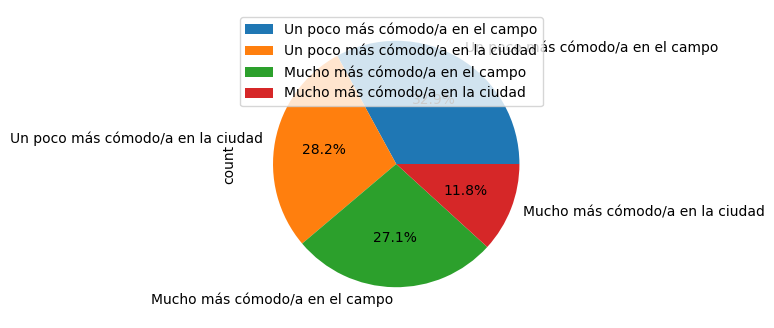

In [960]:
# XX_PUE_rural_ciudad

# plot
print(encuesta['PUE_rural_ciudad'].value_counts())
encuesta['PUE_rural_ciudad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en la ciudad",'PUE_rural_ciudad_']=0
encuesta.loc[encuesta['PUE_rural_ciudad']=="Un poco más cómodo/a en la ciudad",'PUE_rural_ciudad_']=1/3
encuesta.loc[encuesta['PUE_rural_ciudad']=="Un poco más cómodo/a en el campo",'PUE_rural_ciudad_']=2/3
encuesta.loc[encuesta['PUE_rural_ciudad']=="Mucho más cómodo/a en el campo",'PUE_rural_ciudad_']=1

# Drop PUE_rural_ciudad
encuesta.drop(['PUE_rural_ciudad'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_rural_ciudad_':'XX_PUE_rural_ciudad'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==0,'PUE_ratioPueblo2'] = -4
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==1/3,'PUE_ratioPueblo2'] = -2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==2/3,'PUE_ratioPueblo2'] = 2
encuesta.loc[encuesta['XX_PUE_rural_ciudad']==1,'PUE_ratioPueblo2'] = 4

PUE_rural_ciudad2
Un entorno rural donde todos se conocen.         52
Un entorno urbano con diversidad de personas.    33
Name: count, dtype: int64

 (85, 162)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2520301247.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad2']=="Un entorno rural donde todos se conocen.",'PUE_rural_ciudad2_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2520301247.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==0,'PUE_ratioPueblo3'] = -4


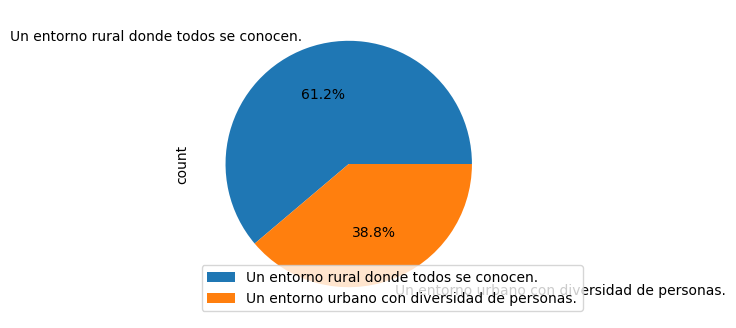

In [961]:
# PUE_rural_ciudad2

# plot
print(encuesta['PUE_rural_ciudad2'].value_counts())
encuesta['PUE_rural_ciudad2'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_rural_ciudad2']=="Un entorno rural donde todos se conocen.",'PUE_rural_ciudad2_']=1
encuesta['PUE_rural_ciudad2_']=encuesta['PUE_rural_ciudad2_'].fillna(0).astype(int)

# Drop PUE_rural_ciudad2
encuesta.drop(['PUE_rural_ciudad2'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_rural_ciudad2_':'PUE_rural_ciudad2_Rural'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo3
encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==0,'PUE_ratioPueblo3'] = -4
encuesta.loc[encuesta['PUE_rural_ciudad2_Rural']==1,'PUE_ratioPueblo3'] = 4

PUE_aire_libre
A menudo     45
Raramente    28
Siempre      10
Nunca         2
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\770222681.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_aire_libre']=="Nunca",'PUE_aire_libre_']=0



 (85, 163)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\770222681.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_aire_libre']==0,'PUE_ratioPueblo4'] = -4


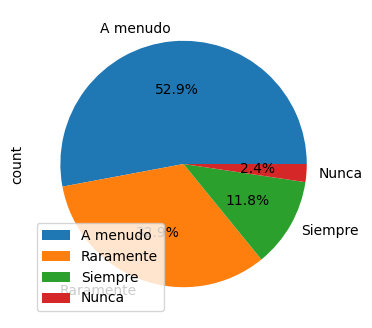

In [962]:
# XX_PUE_aire_libre

# plot
print(encuesta['PUE_aire_libre'].value_counts())
encuesta['PUE_aire_libre'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_aire_libre']=="Nunca",'PUE_aire_libre_']=0
encuesta.loc[encuesta['PUE_aire_libre']=="Raramente",'PUE_aire_libre_']=1/3
encuesta.loc[encuesta['PUE_aire_libre']=="A menudo",'PUE_aire_libre_']=2/3
encuesta.loc[encuesta['PUE_aire_libre']=="Siempre",'PUE_aire_libre_']=1

# Drop PUE_aire_libre
encuesta.drop(['PUE_aire_libre'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_aire_libre_':'XX_PUE_aire_libre'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo4
encuesta.loc[encuesta['XX_PUE_aire_libre']==0,'PUE_ratioPueblo4'] = -4
encuesta.loc[encuesta['XX_PUE_aire_libre']==1/3,'PUE_ratioPueblo4'] = -2
encuesta.loc[encuesta['XX_PUE_aire_libre']==2/3,'PUE_ratioPueblo4'] = 2
encuesta.loc[encuesta['XX_PUE_aire_libre']==1,'PUE_ratioPueblo4'] = 4

PUE_trabajos_agrícolas
No    55
Sí    30
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2571727315.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_trabajos_agrícolas']=="Sí",'PUE_trabajos_agrícolas_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2571727315.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_trabajos_agrícolas']==0,'PUE_ratioPueblo5'] = -4



 (85, 164)


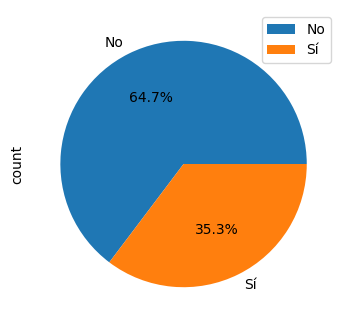

In [963]:
# PUE_trabajos_agrícolas

# plot
print(encuesta['PUE_trabajos_agrícolas'].value_counts())
encuesta['PUE_trabajos_agrícolas'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_trabajos_agrícolas']=="Sí",'PUE_trabajos_agrícolas_']=1
encuesta['PUE_trabajos_agrícolas_']=encuesta['PUE_trabajos_agrícolas_'].fillna(0).astype(int)

# Drop PUE_trabajos_agrícolas
encuesta.drop(['PUE_trabajos_agrícolas'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_trabajos_agrícolas_':'PUE_trabajos_agrícolas'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo5
encuesta.loc[encuesta['PUE_trabajos_agrícolas']==0,'PUE_ratioPueblo5'] = -4
encuesta.loc[encuesta['PUE_trabajos_agrícolas']==1,'PUE_ratioPueblo5'] = 4

PUE_alimmentación
Compro todo en un supermercado.                                                                                          54
Compro casi todo en el supermercado y cultivo ciertos alimentos (albahaca, rúcula,  menta, fresas, pimientos, etc..).    21
Cultivo vegetales, frutas y complementos alimentarios, y compro el resto en el super mercado.                             5
Compro a domicilio en muchas ocasiones                                                                                    4
No compro nada en el supermercado. (o practicamente nada)                                                                 1
Name: count, dtype: int64

 (85, 165)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3045232950.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_alimmentación']=="Compro a domicilio en muchas ocasiones",'PUE_alimmentación_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3045232950.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_alimmentación']==0,'PUE_ratioPueblo6'] = -4


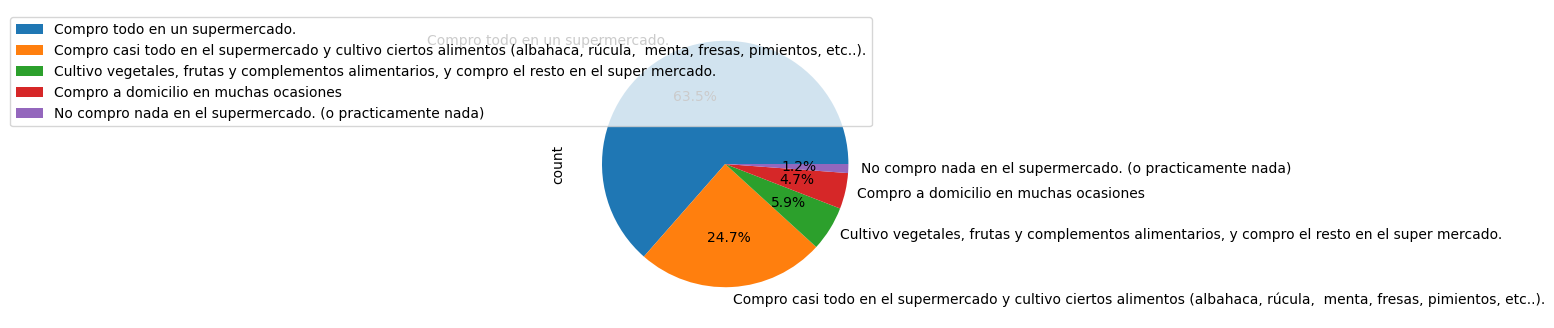

In [964]:
# XX_PUE_alimmentación

# plot
print(encuesta['PUE_alimmentación'].value_counts())
encuesta['PUE_alimmentación'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_alimmentación']=="Compro a domicilio en muchas ocasiones",'PUE_alimmentación_']=0
encuesta.loc[encuesta['PUE_alimmentación']=="Compro todo en un supermercado.",'PUE_alimmentación_']=1/4
encuesta.loc[encuesta['PUE_alimmentación']=="Compro casi todo en el supermercado y cultivo ciertos alimentos (albahaca, rúcula,  menta, fresas, pimientos, etc..).",'PUE_alimmentación_']=2/4
encuesta.loc[encuesta['PUE_alimmentación']=="Cultivo vegetales, frutas y complementos alimentarios, y compro el resto en el super mercado.",'PUE_alimmentación_']=3/4
encuesta.loc[encuesta['PUE_alimmentación']=="No compro nada en el supermercado. (o practicamente nada)",'PUE_alimmentación_']=1

# Drop PUE_alimmentación
encuesta.drop(['PUE_alimmentación'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_alimmentación_':'XX_PUE_alimmentación'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo6
encuesta.loc[encuesta['XX_PUE_alimmentación']==0,'PUE_ratioPueblo6'] = -4
encuesta.loc[encuesta['XX_PUE_alimmentación']==1/4,'PUE_ratioPueblo6'] = -2
encuesta.loc[encuesta['XX_PUE_alimmentación']==2/4,'PUE_ratioPueblo6'] = 0
encuesta.loc[encuesta['XX_PUE_alimmentación']==3/4,'PUE_ratioPueblo6'] = 2
encuesta.loc[encuesta['XX_PUE_alimmentación']==1,'PUE_ratioPueblo6'] = 4

PUE_ciudad_urbano
Área urbana             58
Gran ciudad             17
No tengo preferencia    10
Name: count, dtype: int64


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2084598860.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_urbano']=="Gran ciudad",'PUE_ciudad_urbano_']=0



 (85, 166)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2084598860.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0,'PUE_ratioPueblo7'] = -4


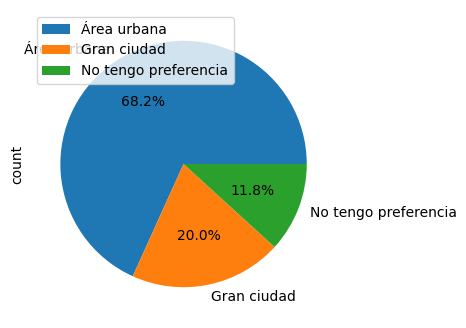

In [965]:
# XX_PUE_ciudad_urbano

# plot
print(encuesta['PUE_ciudad_urbano'].value_counts())
encuesta['PUE_ciudad_urbano'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_ciudad_urbano']=="Gran ciudad",'PUE_ciudad_urbano_']=0
encuesta.loc[encuesta['PUE_ciudad_urbano']=="No tengo preferencia",'PUE_ciudad_urbano_']=0.5
encuesta.loc[encuesta['PUE_ciudad_urbano']=="Área urbana",'PUE_ciudad_urbano_']=1

# Drop PUE_ciudad_urbano
encuesta.drop(['PUE_ciudad_urbano'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ciudad_urbano_':'XX_PUE_ciudad_urbano'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo7
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0,'PUE_ratioPueblo7'] = -4
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==0.5,'PUE_ratioPueblo7'] = -2
encuesta.loc[encuesta['XX_PUE_ciudad_urbano']==1,'PUE_ratioPueblo7'] = 0

PUE_cultural_ciudad
Algo        41
Mucho       24
No mucho    16
Nada         4
Name: count, dtype: int64

 (85, 167)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1126317265.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_cultural_ciudad']=="Mucho",'PUE_cultural_ciudad_']=0
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1126317265.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==0,'PUE_ratioPueblo8'] = -4


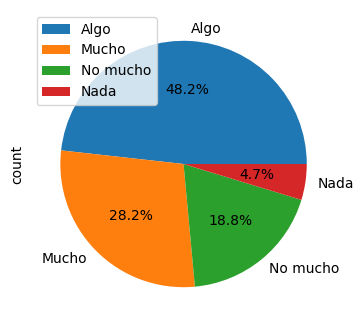

In [966]:
# XX_PUE_cultural_ciudad

# plot
print(encuesta['PUE_cultural_ciudad'].value_counts())
encuesta['PUE_cultural_ciudad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Mucho",'PUE_cultural_ciudad_']=0
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Algo",'PUE_cultural_ciudad_']=1/3
encuesta.loc[encuesta['PUE_cultural_ciudad']=="No mucho",'PUE_cultural_ciudad_']=2/3
encuesta.loc[encuesta['PUE_cultural_ciudad']=="Nada",'PUE_cultural_ciudad_']=1

# Drop PUE_cultural_ciudad
encuesta.drop(['PUE_cultural_ciudad'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_cultural_ciudad_':'XX_PUE_cultural_ciudad'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo8
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==0,'PUE_ratioPueblo8'] = -4
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==1/3,'PUE_ratioPueblo8'] = -2
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==2/3,'PUE_ratioPueblo8'] = 2
encuesta.loc[encuesta['XX_PUE_cultural_ciudad']==1,'PUE_ratioPueblo8'] = 4

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\4082778876.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_siempre']=="Sí",'PUE_ciudad_siempre_']=1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\4082778876.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['PUE_ciudad_siempre']==0,'PUE_ratioPueblo9'] = 4


PUE_ciudad_siempre
Sí    68
No    17
Name: count, dtype: int64

 (85, 168)


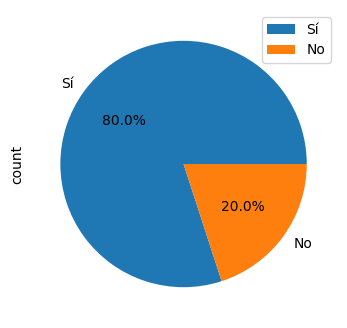

In [967]:
# PUE_ciudad_siempre

# plot
print(encuesta['PUE_ciudad_siempre'].value_counts())
encuesta['PUE_ciudad_siempre'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['PUE_ciudad_siempre']=="Sí",'PUE_ciudad_siempre_']=1
encuesta['PUE_ciudad_siempre_']=encuesta['PUE_ciudad_siempre_'].fillna(0).astype(int)

# Drop PUE_ciudad_siempre
encuesta.drop(['PUE_ciudad_siempre'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ciudad_siempre_':'PUE_ciudad_siempre'}, inplace=True)
print("\n",encuesta.shape)

# PUE_ratioPueblo9
encuesta.loc[encuesta['PUE_ciudad_siempre']==0,'PUE_ratioPueblo9'] = 4
encuesta.loc[encuesta['PUE_ciudad_siempre']==1,'PUE_ratioPueblo9'] = -4

In [968]:
# XX_PUE_ratioPueblo

encuesta['PUE_ratioPuebloo']=encuesta['PUE_ratioPueblo']+encuesta['PUE_ratioPueblo2']+encuesta['PUE_ratioPueblo3']+encuesta['PUE_ratioPueblo4']+encuesta['PUE_ratioPueblo5']+encuesta['PUE_ratioPueblo6']+encuesta['PUE_ratioPueblo7']+encuesta['PUE_ratioPueblo8']+encuesta['PUE_ratioPueblo9']
encuesta.drop(['PUE_ratioPueblo', 'PUE_ratioPueblo2', 'PUE_ratioPueblo3', 'PUE_ratioPueblo4', 'PUE_ratioPueblo5', 'PUE_ratioPueblo6', 'PUE_ratioPueblo7', 'PUE_ratioPueblo8', 'PUE_ratioPueblo9'], axis=1, inplace=True)
encuesta.rename(columns={'PUE_ratioPuebloo':'XX_PUE_ratioPueblo'}, inplace=True)

# standarize to 0-1
encuesta['XX_PUE_ratioPueblo'] = (encuesta['XX_PUE_ratioPueblo']-encuesta['XX_PUE_ratioPueblo'].min())/(encuesta['XX_PUE_ratioPueblo'].max()-encuesta['XX_PUE_ratioPueblo'].min())
print(encuesta.shape)

(85, 161)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1642449023.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['PUE_ratioPuebloo']=encuesta['PUE_ratioPueblo']+encuesta['PUE_ratioPueblo2']+encuesta['PUE_ratioPueblo3']+encuesta['PUE_ratioPueblo4']+encuesta['PUE_ratioPueblo5']+encuesta['PUE_ratioPueblo6']+encuesta['PUE_ratioPueblo7']+encuesta['PUE_ratioPueblo8']+encuesta['PUE_ratioPueblo9']


## 1.4 OBJ (Objetivo): OBJ_zona_temperatura_, OBJ_zona_clima_estable, XX_OBJ_zona_clima2_seco, OBJ_zona_vivir_, XX_OBJ_zona_población, XX_OBJ_zona_proximidad

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\88367288.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Frio'),'OBJ_zona_temperatura_frio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\88367288.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Medio'),'OBJ_zona_temperatura_medio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\88367288.py:6: PerformanceWarning: DataFrame is highly fragm

(85, 164)


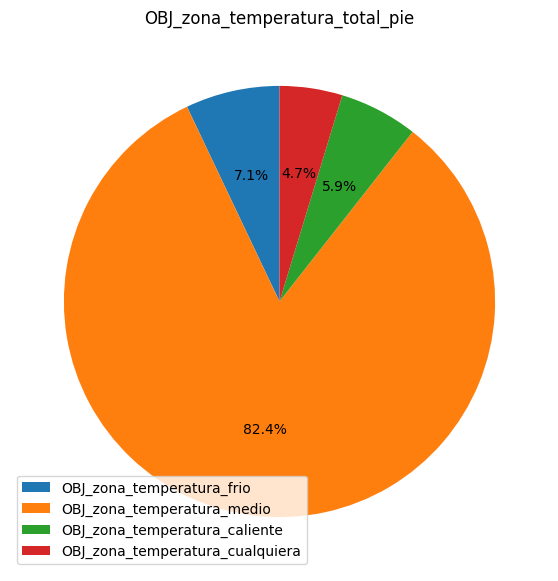

In [969]:
# OBJ_zona_temperatura_

# Change OBJ_zona_temperatura to binary
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Frio'),'OBJ_zona_temperatura_frio'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Medio'),'OBJ_zona_temperatura_medio'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Caliente'),'OBJ_zona_temperatura_caliente'] = 1
encuesta.loc[encuesta['OBJ_zona_temperatura'].str.contains('Cualquiera'),'OBJ_zona_temperatura_cualquiera'] = 1

# compile
encuesta.drop(['OBJ_zona_temperatura'], axis=1, inplace=True)# Drop OBJ_zona_temperatura
OBJ_zona_temperatura=encuesta.filter(regex='^OBJ_zona_temperatura').fillna(0)# Fill na
OBJ_zona_temperatura = OBJ_zona_temperatura.astype(int)# Change OBJ_zona_temperatura to int
encuesta[OBJ_zona_temperatura.columns] = OBJ_zona_temperatura# Add OBJ_zona_temperatura to encuesta
print(encuesta.shape)

# plot
OBJ_zona_temperatura_total=OBJ_zona_temperatura.T
OBJ_zona_temperatura_total['total']=OBJ_zona_temperatura_total.sum(axis=1)
OBJ_zona_temperatura_total_pie=OBJ_zona_temperatura_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='OBJ_zona_temperatura_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

OBJ_zona_clima
Que no cambien mucho las temperaturas a lo largo del año.        71
Que hayan extremos. Verano mucho calor e Invierno mucho frio.    14
Name: count, dtype: int64

 (85, 164)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1582949856.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_clima']=="Que no cambien mucho las temperaturas a lo largo del año.",'OBJ_zona_clima_']=1


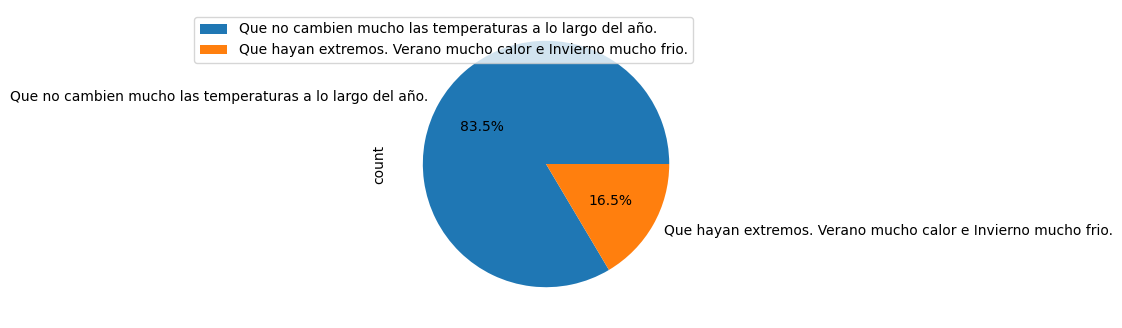

In [970]:
# OBJ_zona_clima_estable

# plot
print(encuesta['OBJ_zona_clima'].value_counts())
encuesta['OBJ_zona_clima'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['OBJ_zona_clima']=="Que no cambien mucho las temperaturas a lo largo del año.",'OBJ_zona_clima_']=1
encuesta['OBJ_zona_clima_']=encuesta['OBJ_zona_clima_'].fillna(0).astype(int)

# Drop OBJ_zona_clima
encuesta.drop(['OBJ_zona_clima'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_clima_':'OBJ_zona_clima_estable'}, inplace=True)
print("\n",encuesta.shape)

OBJ_zona_clima2
Seco          42
Cualquiera    28
Húmedo        15
Name: count, dtype: int64



 (85, 164)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\135725698.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_clima2']=="Húmedo",'OBJ_zona_clima2_']=0


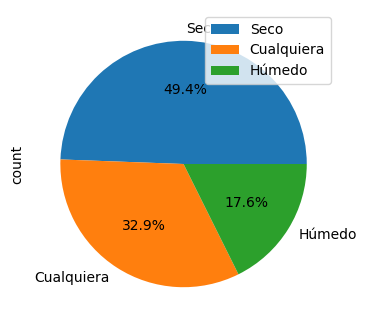

In [971]:
# XX_OBJ_zona_clima2_seco

# plot
print(encuesta['OBJ_zona_clima2'].value_counts())
encuesta['OBJ_zona_clima2'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to categorical
encuesta.loc[encuesta['OBJ_zona_clima2']=="Húmedo",'OBJ_zona_clima2_']=0
encuesta.loc[encuesta['OBJ_zona_clima2']=="Cualquiera",'OBJ_zona_clima2_']=0.5
encuesta.loc[encuesta['OBJ_zona_clima2']=="Seco",'OBJ_zona_clima2_']=1

# Drop OBJ_zona_clima2
encuesta.drop(['OBJ_zona_clima2'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_clima2_':'XX_OBJ_zona_clima2_seco'}, inplace=True)
print("\n",encuesta.shape)

(85, 169)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2589914764.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona costera'),'OBJ_zona_vivir_costera'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2589914764.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de montaña'),'OBJ_zona_vivir_montaña'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\2589914764.py:6: PerformanceWarning: DataFrame is highly 

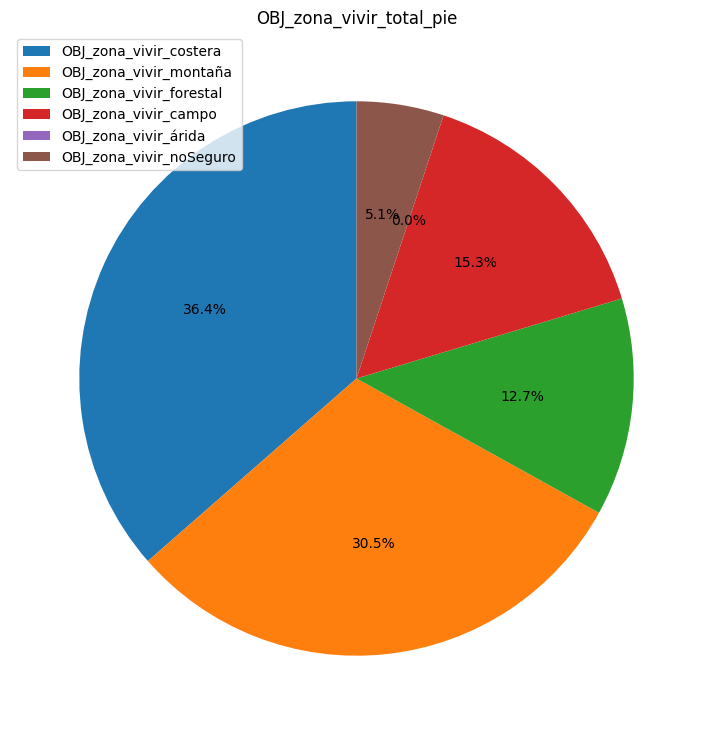

In [972]:
# OBJ_zona_vivir_

# Change OBJ_zona_vivir to binary
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona costera'),'OBJ_zona_vivir_costera'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de montaña'),'OBJ_zona_vivir_montaña'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona forestal'),'OBJ_zona_vivir_forestal'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona de campo'),'OBJ_zona_vivir_campo'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('Zona árida'),'OBJ_zona_vivir_árida'] = 1
encuesta.loc[encuesta['OBJ_zona_vivir'].str.contains('No estoy seguro/No aplica'),'OBJ_zona_vivir_noSeguro'] = 1

# compile
encuesta.drop(['OBJ_zona_vivir'], axis=1, inplace=True)# Drop OBJ_zona_vivir
OBJ_zona_vivir=encuesta.filter(regex='^OBJ_zona_vivir').fillna(0)# Fill na
OBJ_zona_vivir = OBJ_zona_vivir.astype(int)# Change OBJ_zona_vivir to int
encuesta[OBJ_zona_vivir.columns] = OBJ_zona_vivir# Add OBJ_zona_vivir to encuesta
print(encuesta.shape)

# plot
OBJ_zona_vivir_total=OBJ_zona_vivir.T
OBJ_zona_vivir_total['total']=OBJ_zona_vivir_total.sum(axis=1)
OBJ_zona_vivir_total_pie=OBJ_zona_vivir_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='OBJ_zona_vivir_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

OBJ_zona_población
Medio (ciudad pequeña: Granollers)          43
Alto (ciudad media: Barcelona)              17
Bajo (pueblos)                              17
Muy alto (ciudad grande: Mexico DF)          2
Muy Bajo (aldeas o pueblos muy pequeños)     2
Cualquiera                                   2
Pueblos en riesgo de despoblación            2
Name: count, dtype: int64

 (85, 169)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3867676243.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_población']=="Muy alto (ciudad grande: Mexico DF)",'OBJ_zona_población_']=0


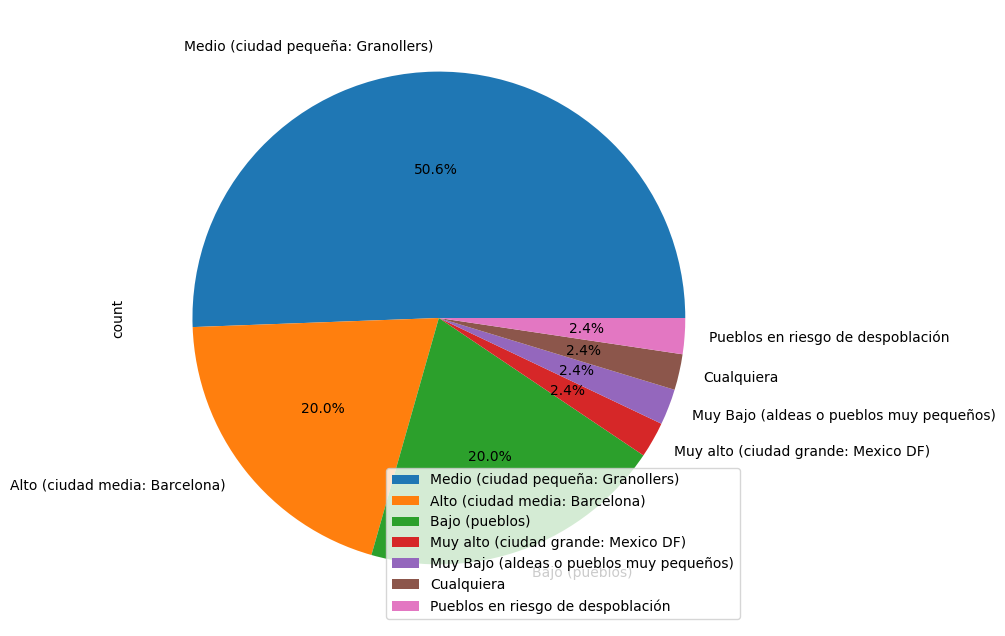

In [973]:
# XX_OBJ_zona_población

# plot
print(encuesta['OBJ_zona_población'].value_counts())
encuesta['OBJ_zona_población'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(8,8))

# to categorical
encuesta.loc[encuesta['OBJ_zona_población']=="Muy alto (ciudad grande: Mexico DF)",'OBJ_zona_población_']=0
encuesta.loc[encuesta['OBJ_zona_población']=="Alto (ciudad media: Barcelona)",'OBJ_zona_población_']=1/5
encuesta.loc[encuesta['OBJ_zona_población']=="Medio (ciudad pequeña: Granollers)",'OBJ_zona_población_']=2/5
encuesta.loc[encuesta['OBJ_zona_población']=="Cualquiera",'OBJ_zona_población_']=0.5
encuesta.loc[encuesta['OBJ_zona_población']=="Bajo (pueblos)",'OBJ_zona_población_']=3/5
encuesta.loc[encuesta['OBJ_zona_población']=="Muy Bajo (aldeas o pueblos muy pequeños)",'OBJ_zona_población_']=4/5
encuesta.loc[encuesta['OBJ_zona_población']=="Pueblos en riesgo de despoblación",'OBJ_zona_población_']=1


# Drop OBJ_zona_población
encuesta.drop(['OBJ_zona_población'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_población_':'XX_OBJ_zona_población'}, inplace=True)
print("\n",encuesta.shape)

OBJ_zona_proximidad
Medio                        43
Mucho (deben estar cerca)    35
Poco                          7
Name: count, dtype: int64

 (85, 169)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\1324800071.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['OBJ_zona_proximidad']=="Mucho (deben estar cerca)",'OBJ_zona_proximidad_']=0


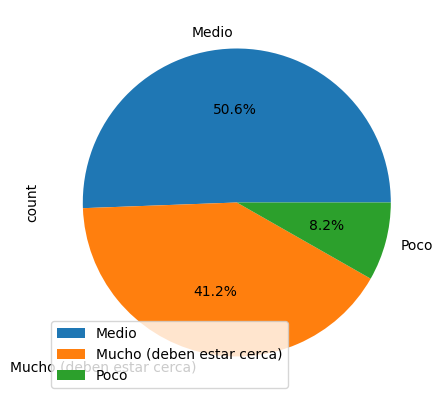

In [974]:
# XX_OBJ_zona_proximidad

# plot
print(encuesta['OBJ_zona_proximidad'].value_counts())
encuesta['OBJ_zona_proximidad'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(5,5))

# to categorical
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Mucho (deben estar cerca)",'OBJ_zona_proximidad_']=0
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Medio",'OBJ_zona_proximidad_']=0.5
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Cualquiera",'OBJ_zona_proximidad_']=0.6
encuesta.loc[encuesta['OBJ_zona_proximidad']=="Poco",'OBJ_zona_proximidad_']=1

# Drop OBJ_zona_proximidad
encuesta.drop(['OBJ_zona_proximidad'], axis=1, inplace=True)
encuesta.rename(columns={'OBJ_zona_proximidad_':'XX_OBJ_zona_proximidad'}, inplace=True)
print("\n",encuesta.shape)

## 1.5 TFM (Treball Final Máster): TFM_espacios_, TFM_actividades, TFM_compartir, TFM_muadrse

(85, 175)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\640010794.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_espacios'].str.contains('Fuera de casa (trabajo, estudio, ocio, etc…)',regex=False),'TFM_espacios_fuera'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\640010794.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_espacios'].str.contains('Dormitorio (dormir + otros)',regex=False),'TFM_espacios_dormitorio'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_1662

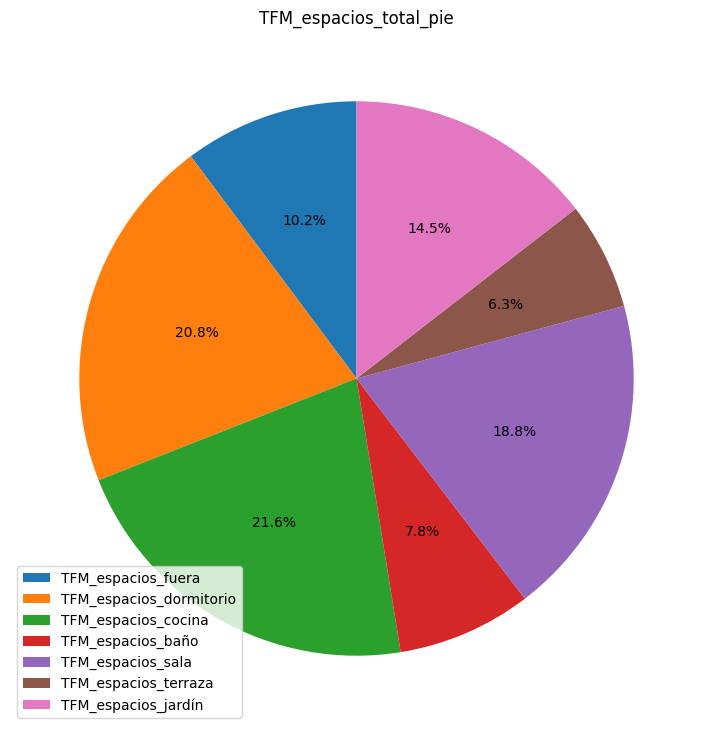

In [975]:
# TFM_espacios_

# Change TFM_espacios to binary
encuesta.loc[encuesta['TFM_espacios'].str.contains('Fuera de casa (trabajo, estudio, ocio, etc…)',regex=False),'TFM_espacios_fuera'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Dormitorio (dormir + otros)',regex=False),'TFM_espacios_dormitorio'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Cocina'),'TFM_espacios_cocina'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Baño'),'TFM_espacios_baño'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Sala de estar'),'TFM_espacios_sala'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Terraza'),'TFM_espacios_terraza'] = 1
encuesta.loc[encuesta['TFM_espacios'].str.contains('Jardín'),'TFM_espacios_jardín'] = 1

# compile
encuesta.drop(['TFM_espacios'], axis=1, inplace=True)# Drop TFM_espacios
TFM_espacios=encuesta.filter(regex='^TFM_espacios').fillna(0)# Fill na
TFM_espacios = TFM_espacios.astype(int)# Change TFM_espacios to int
encuesta[TFM_espacios.columns] = TFM_espacios# Add TFM_espacios to encuesta
print(encuesta.shape)

# plot
TFM_espacios_total=TFM_espacios.T
TFM_espacios_total['total']=TFM_espacios_total.sum(axis=1)
TFM_espacios_total_pie=TFM_espacios_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_espacios_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3298452275.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_actividades'].str.contains('Leer'),'TFM_actividades_leer'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3298452275.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_actividades'].str.contains('Cocinar'),'TFM_actividades_cocinar'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3298452275.py:6: PerformanceWarning: DataFrame is highly fragmented.  Th

(85, 183)


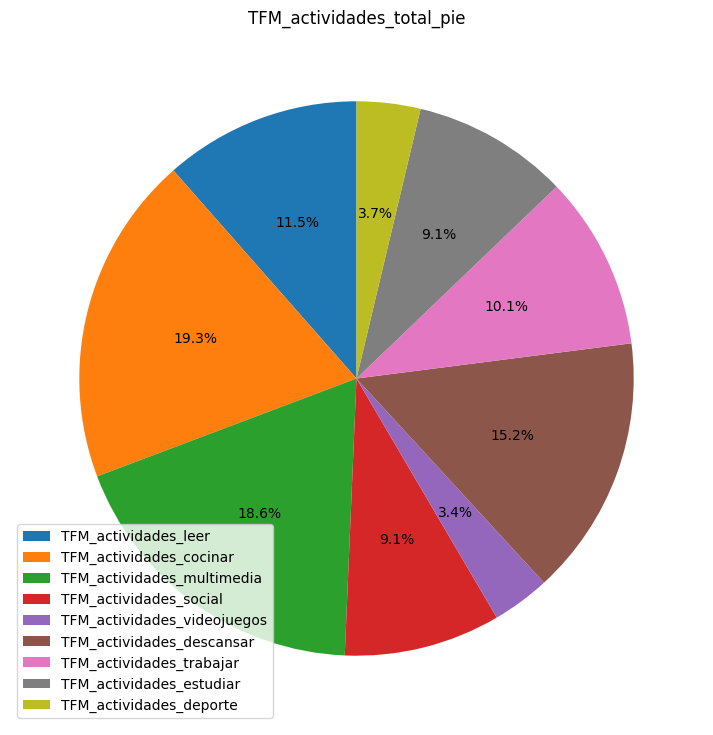

In [976]:
# TFM_actividades_

# Change TFM_actividades to binary
encuesta.loc[encuesta['TFM_actividades'].str.contains('Leer'),'TFM_actividades_leer'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Cocinar'),'TFM_actividades_cocinar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Ver contenido multimedia'),'TFM_actividades_multimedia'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Reuniones sociales en el hogar'),'TFM_actividades_social'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Videojuegos'),'TFM_actividades_videojuegos'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Descansar (no cuenta dormir por la noche)', regex=False),'TFM_actividades_descansar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Trabajar'),'TFM_actividades_trabajar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Estudiar'),'TFM_actividades_estudiar'] = 1
encuesta.loc[encuesta['TFM_actividades'].str.contains('Hacer deporte'),'TFM_actividades_deporte'] = 1

# compile
encuesta.drop(['TFM_actividades'], axis=1, inplace=True)# Drop TFM_actividades
TFM_actividades=encuesta.filter(regex='^TFM_actividades').fillna(0)# Fill na
TFM_actividades = TFM_actividades.astype(int)# Change TFM_actividades to int
encuesta[TFM_actividades.columns] = TFM_actividades# Add TFM_actividades to encuesta
print(encuesta.shape)

# plot
TFM_actividades_total=TFM_actividades.T
TFM_actividades_total['total']=TFM_actividades_total.sum(axis=1)
TFM_actividades_total_pie=TFM_actividades_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_actividades_total_pie',figsize=(9,9))
plt.ylabel('')
plt.show()

TFM_compartir
No    52
Si    33
Name: count, dtype: int64

 (85, 183)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\139929348.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir']=="Si",'TFM_compartir_']=1


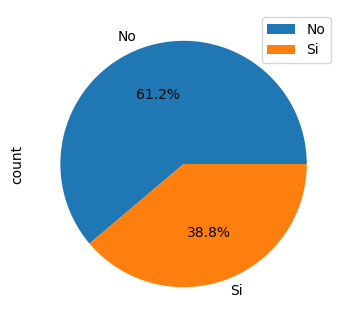

In [977]:
# TFM_compartir

# plot
print(encuesta['TFM_compartir'].value_counts())
encuesta['TFM_compartir'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['TFM_compartir']=="Si",'TFM_compartir_']=1
encuesta['TFM_compartir_']=encuesta['TFM_compartir_'].fillna(0).astype(int)

# Drop TFM_compartir
encuesta.drop(['TFM_compartir'], axis=1, inplace=True)
encuesta.rename(columns={'TFM_compartir_':'TFM_compartir'}, inplace=True)
print("\n",encuesta.shape)

(85, 187)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3759458732.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Sala de estar'),'TFM_compartir_no_sala'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3759458732.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Cocina'),'TFM_compartir_no_cocina'] = 1
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\3759458732.py:9: PerformanceWarning: DataFrame is highly frag

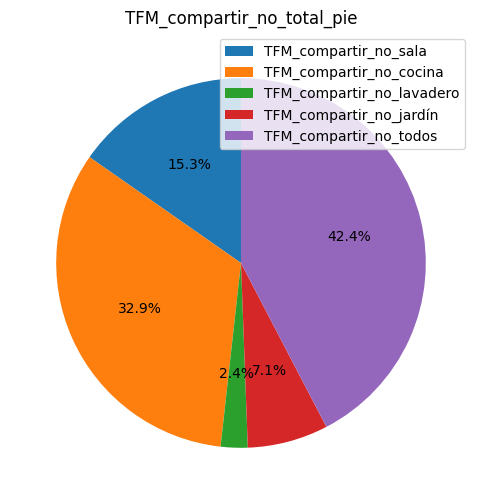

In [978]:
# TFM_compartir_no

#fill na to 'Todos
encuesta['TFM_compartir_no'].fillna('Todos', inplace=True)

# Change TFM_compartir_no to binary
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Sala de estar'),'TFM_compartir_no_sala'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Cocina'),'TFM_compartir_no_cocina'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Lavadero'),'TFM_compartir_no_lavadero'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Jardin'),'TFM_compartir_no_jardín'] = 1
encuesta.loc[encuesta['TFM_compartir_no'].str.contains('Todos'),'TFM_compartir_no_todos'] = 1

# compile
encuesta.drop(['TFM_compartir_no'], axis=1, inplace=True)# Drop TFM_compartir_no
TFM_compartir_no=encuesta.filter(regex='^TFM_compartir_no').fillna(0)# Fill na
TFM_compartir_no = TFM_compartir_no.astype(int)# Change TFM_compartir_no to int
encuesta[TFM_compartir_no.columns] = TFM_compartir_no# Add TFM_compartir_no to encuesta
print(encuesta.shape)

# plot
TFM_compartir_no_total=TFM_compartir_no.T
TFM_compartir_no_total['total']=TFM_compartir_no_total.sum(axis=1)
TFM_compartir_no_total_pie=TFM_compartir_no_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='TFM_compartir_no_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

TFM_muadrse
Si    58
No    27
Name: count, dtype: int64

 (85, 187)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\645999273.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta.loc[encuesta['TFM_muadrse']=="Si",'TFM_muadrse_']=1


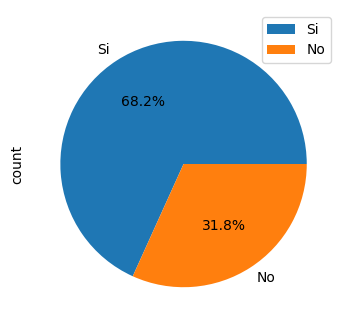

In [979]:
# TFM_muadrse

# plot
print(encuesta['TFM_muadrse'].value_counts())
encuesta['TFM_muadrse'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(4,4))

# to binary
encuesta.loc[encuesta['TFM_muadrse']=="Si",'TFM_muadrse_']=1
encuesta['TFM_muadrse_']=encuesta['TFM_muadrse_'].fillna(0).astype(int)

# Drop TFM_muadrse
encuesta.drop(['TFM_muadrse'], axis=1, inplace=True)
encuesta.rename(columns={'TFM_muadrse_':'TFM_muadrse'}, inplace=True)
print("\n",encuesta.shape)

In [980]:
encuesta['correoo']=encuesta['correo']
encuesta.drop(['correo'], axis=1, inplace=True)
encuesta.rename(columns={'correoo':'correo'}, inplace=True)
encuesta['correo'].fillna('No', inplace=True)

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\245192305.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encuesta['correoo']=encuesta['correo']


# 2. Clusterización OBJ (Ojetivo)

In [981]:
encuesta1=encuesta.copy()
encuesta=encuesta.drop(['OBJ_zona_vivir_árida','correo'], axis=1)
OBJ=encuesta.filter(regex='OBJ_')

addcolumns=['PP_sobre_ti_social','PP_sobre_ti_familia','PP_sobre_ti_aventurero','PP_sobre_ti_espiritualidad','PP_sobre_ti_vivir','PP_sobre_ti_minimalista','PP_sobre_ti_MAmbiente','PP_sobre_ti_playa','PP_sobre_ti_deporte','PP_sobre_ti_aireLibre','PP_sobre_ti_tecnología','PUE_preferencias_entorno_naturalezaPaz','PUE_preferencias_entorno_ciudadClultura','PUE_preferencias_entorno_ciudadServicios','PUE_preferencias_entorno_ciudadArquitectura','PUE_preferencias_entorno_ciudadEducación','PUE_preferencias_entorno_ciudadTransporte','XX_PUE_ratioPueblo']
#addcolumns to OBJ
OBJ[addcolumns]=encuesta[addcolumns]

#drop some columns after checking characteristic importance
OBJ.drop(['OBJ_zona_temperatura_caliente','OBJ_zona_temperatura_cualquiera','PP_sobre_ti_vivir','OBJ_zona_vivir_noSeguro','OBJ_zona_temperatura_frio','OBJ_zona_temperatura_medio','PP_sobre_ti_social','PP_sobre_ti_tecnología','OBJ_zona_clima_estable','PP_sobre_ti_minimalista'], axis=1, inplace=True)

#join some columns
OBJ['XX_PUE_preferencias_entorno_ciudad_CSET']=OBJ['PUE_preferencias_entorno_ciudadClultura']+OBJ['PUE_preferencias_entorno_ciudadServicios']+OBJ['PUE_preferencias_entorno_ciudadEducación']+OBJ['PUE_preferencias_entorno_ciudadTransporte']
OBJ.drop(['PUE_preferencias_entorno_ciudadClultura','PUE_preferencias_entorno_ciudadServicios','PUE_preferencias_entorno_ciudadArquitectura','PUE_preferencias_entorno_ciudadEducación','PUE_preferencias_entorno_ciudadTransporte'], axis=1, inplace=True)
#standarize to 0-1
OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'] = (OBJ['XX_PUE_preferencias_entorno_ciudad_CSET']-OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].min())/(OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].max()-OBJ['XX_PUE_preferencias_entorno_ciudad_CSET'].min())
print(OBJ.shape)

print(OBJ.shape)
OBJ.head()

(85, 17)
(85, 17)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ[addcolumns]=encuesta[addcolumns]
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ[addcolumns]=encuesta[addcolumns]
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\636070400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


XX_OBJ_zona_clima2_seco  OBJ_zona_vivir_costera  OBJ_zona_vivir_montaña   
0                      1.0                       1                       0  \
1                      1.0                       1                       0   
2                      1.0                       0                       1   
3                      0.0                       0                       1   
4                      0.5                       0                       0   

   OBJ_zona_vivir_forestal  OBJ_zona_vivir_campo  XX_OBJ_zona_población   
0                        0                     0                    0.4  \
1                        0                     0                    0.2   
2                        0                     0                    0.2   
3                        1                     0                    0.4   
4                        1                     0                    0.2   

   XX_OBJ_zona_proximidad  PP_sobre_ti_familia  PP_sobre_ti_aventurero   
0                     0.0                    1                       0  \
1                     0.5                    1                       0   
2                     0.0                    0                       0   
3                     0.0                    1                       0   
4                     0.0                    1                       0   

   PP_sobre_ti_espiritualidad  PP_sobre_ti_MAmbiente  PP_sobre_ti_playa   
0                           1                      1                  1  \
1                           0                      0                  0   
2                           0                      0                  0   
3                           0                      1                  0   
4                           0                      1                  1   

   PP_sobre_ti_deporte  PP_sobre_ti_aireLibre   
0                    0                      0  \
1                    0                      1   
2                    0                      0   
3                    0                      0   
4                    0                      0   

   PUE_preferencias_entorno_naturalezaPaz  XX_PUE_ratioPueblo   
0                                       0            0.201681  \
1                                       1            0.243697   
2                                       1            0.378151   
3                                       1            0.201681   
4                                       1            0.294118   

   XX_PUE_preferencias_entorno_ciudad_CSET  
0                                     0.75  
1                                     0.50  
2                                     0.50  
3                                     0.50  
4                                     0.50

## 2.2 ADAPT DATAFRAME

En el caso del algoritmo K-means, no es necesario realizar validación cruzada o múltiples iteraciones, ya que el K-means es un algoritmo de aprendizaje no supervisado que busca agrupar los datos en K grupos predefinidos. A diferencia de los modelos supervisados como XGBoost o SVM, el K-means no tiene parámetros que se ajusten durante el entrenamiento y, por lo tanto, no necesita validación cruzada ni múltiples iteraciones.

El K-means es un algoritmo determinístico y, dado un número de clusters K y unas condiciones iniciales, siempre convergerá al mismo resultado. La inicialización de los centroides puede afectar los resultados, pero una vez que se fijan los centroides iniciales, el algoritmo encontrará los clusters correspondientes.

In [982]:
encuesta1['correo'].unique()

array(['No', 'rosalba.loaiza.ayala@gmail.com', 'juancid3103@gmail.com',
       'medicamex@gmail.com ', 'Aponteloaizag@gmail.com',
       'niktef@gmail.com ', 'Sebastian.sedas@udem.edu',
       'helenalealperez@gmail.com', 'Rosies_library@yahoo.com',
       'jhonnydeagrela4@gmail.com', 'Normalguse@gmail.com',
       'Si (siempre que el workshop me pille cerca de casa jejej)',
       'marcnadalbotet@gmail.com', 'karlalibros.uanl@gmail.com',
       'marga630326@gmail.com', '-', 'Si', 'aurelipede@gmail.com',
       'Si quiero', 'mtorrents@uic.es', 'epiygabi@gmail.com ',
       'Maltimira80@gmail.com ', 'lidiamartinvilar@gmail.com',
       'Xortega84@gmail.com', 'Leopoldo.cg66@gmail.com',
       'kashminaburana@gmail.com', 'floresrojas.am@gmail.com',
       'luis.gil.de.biedma3@gmail.com', 'LAAB.2000@hotmail.com',
       'jessicapintoa94@gmail.com', 'mcgdeblas@gmail.com',
       'nereaportetreche@gmail.com', 'lucasonsound@gmail.com',
       'rortiz.2@hotmail.com', 'roserraes@hotmail.com',
 

In [983]:
#Busquem els participants integrats en la clusterització
correos=['juancid3103@gmail.com', 'floresrojas.am@gmail.com', 'lucasonsound@gmail.com', 'vio.balaguer@gmail.com']
correos=encuesta1[encuesta1['correo'].isin(correos)]
correos=correos.index
correos

Index([2, 52, 65, 68], dtype='int64')

In [984]:
##append / drop index
#correos
##append index 45
#correos=correos.append(pd.Index([45]))
##drop index 81
#correos=correos.drop([81])
#correos

In [985]:
#visualitzem els correus i preparem per assignar els dies d'asistencia
encuesta1_label = pd.concat([encuesta1.loc[correos], encuesta1.iloc[77:]])
#drop index 81
encuesta1_label=encuesta1_label.drop([2, 68, 78, 81])
encuesta1_label['DAY']=0
encuesta1_label[['correo', 'DAY']]

correo  DAY
52               floresrojas.am@gmail.com    0
65                 lucasonsound@gmail.com    0
77  natalia.aponte@students.salle.url.edu    0
79             alejandrocavazos@gmail.com    0
80      rodrigoiglesiasmurrieta@gmail.com    0
82                    relookyou@gmail.com    0
83              marta.dlatorreg@gmail.com    0
84                                     No    0

In [986]:
#assignem els díes en que assistirán
#0 = els dos díes
#1 = el primer día (pel matí o complet)
#2 = el segon día (per la tarda o complet)
#3 = el primer día (per la tarda)
#4 = el segon día (pel matí)
encuesta1_label.loc[encuesta1_label['correo'].str.contains('juancid3103'),'DAY'] = 1
encuesta1_label.loc[encuesta1_label['correo'].str.contains('floresrojas'),'DAY'] = 1
encuesta1_label.loc[encuesta1_label['correo'].str.contains('lucasonsound'),'DAY'] = 1
encuesta1_label.loc[encuesta1_label['correo'].str.contains('balaguer'),'DAY'] = 1
#integrats / no integrats
encuesta1_label.loc[encuesta1_label['correo'].str.contains('natalia.aponte@students.salle.url.edu'),'DAY'] = 3#23 por la tarde
encuesta1_label.loc[encuesta1_label['correo'].str.contains('masha.bondarenko.osiej@gmail.com'),'DAY'] = 0
encuesta1_label.loc[encuesta1_label['correo'].str.contains('alejandrocavazos'),'DAY'] = 0
encuesta1_label.loc[encuesta1_label['correo'].str.contains('rodrigoiglesiasmurrieta'),'DAY'] = 0#24 por la mañana
encuesta1_label.loc[encuesta1_label['correo'].str.contains('relookyou'),'DAY'] = 0
#dia evento
encuesta1_label.loc[encuesta1_label['correo'].str.contains('marta.dlatorreg@'),'DAY'] = 1

encuesta1_label[['correo', 'DAY']]

correo  DAY
52               floresrojas.am@gmail.com    1
65                 lucasonsound@gmail.com    1
77  natalia.aponte@students.salle.url.edu    3
79             alejandrocavazos@gmail.com    0
80      rodrigoiglesiasmurrieta@gmail.com    0
82                    relookyou@gmail.com    0
83              marta.dlatorreg@gmail.com    1
84                                     No    0

In [987]:
#OBJ_label= OBJ[77:]#77
OBJ_label = pd.concat([OBJ.loc[correos], OBJ.iloc[77:]])
#drop index 81
OBJ_label=OBJ_label.drop([81])
#add DAY column
OBJ_label['DAY']=encuesta1_label['DAY']
#create 2 dataframes for each day
OBJ_label1=OBJ_label[(OBJ_label['DAY']==1)|(OBJ_label['DAY']==0)]
OBJ_label2=OBJ_label[(OBJ_label['DAY']==2)|(OBJ_label['DAY']==0)]
#drop DAY column
OBJ_label1.drop(['DAY'], axis=1, inplace=True)
OBJ_label2.drop(['DAY'], axis=1, inplace=True)
OBJ_label.drop(['DAY'], axis=1, inplace=True)
print(OBJ_label.shape)
OBJ_label.head()

(11, 17)


C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\972811005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ_label1.drop(['DAY'], axis=1, inplace=True)
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\972811005.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OBJ_label2.drop(['DAY'], axis=1, inplace=True)


XX_OBJ_zona_clima2_seco  OBJ_zona_vivir_costera  OBJ_zona_vivir_montaña   
2                       1.0                       0                       1  \
52                      0.5                       0                       0   
65                      0.0                       1                       0   
68                      1.0                       0                       1   
77                      1.0                       0                       1   

    OBJ_zona_vivir_forestal  OBJ_zona_vivir_campo  XX_OBJ_zona_población   
2                         0                     0                    0.2  \
52                        0                     0                    0.2   
65                        1                     0                    0.8   
68                        0                     0                    0.2   
77                        0                     1                    0.6   

    XX_OBJ_zona_proximidad  PP_sobre_ti_familia  PP_sobre_ti_aventurero   
2                      0.0                    0                       0  \
52                     0.0                    1                       0   
65                     0.5                    0                       1   
68                     0.5                    1                       1   
77                     0.0                    0                       0   

    PP_sobre_ti_espiritualidad  PP_sobre_ti_MAmbiente  PP_sobre_ti_playa   
2                            0                      0                  0  \
52                           1                      1                  0   
65                           1                      1                  0   
68                           0                      0                  0   
77                           0                      1                  0   

    PP_sobre_ti_deporte  PP_sobre_ti_aireLibre   
2                     0                      0  \
52                    1                      0   
65                    0                      1   
68                    0                      0   
77                    0                      0   

    PUE_preferencias_entorno_naturalezaPaz  XX_PUE_ratioPueblo   
2                                        1            0.378151  \
52                                       1            0.218487   
65                                       1            0.621849   
68                                       1            0.352941   
77                                       1            0.134454   

    XX_PUE_preferencias_entorno_ciudad_CSET  
2                                      0.50  
52                                     0.75  
65                                     0.25  
68                                     0.25  
77                                     0.25

In [988]:
encuesta=encuesta[0:76]
OBJ=OBJ[0:76]#76
print(OBJ.shape)
OBJ.head()

(76, 17)


XX_OBJ_zona_clima2_seco  OBJ_zona_vivir_costera  OBJ_zona_vivir_montaña   
0                      1.0                       1                       0  \
1                      1.0                       1                       0   
2                      1.0                       0                       1   
3                      0.0                       0                       1   
4                      0.5                       0                       0   

   OBJ_zona_vivir_forestal  OBJ_zona_vivir_campo  XX_OBJ_zona_población   
0                        0                     0                    0.4  \
1                        0                     0                    0.2   
2                        0                     0                    0.2   
3                        1                     0                    0.4   
4                        1                     0                    0.2   

   XX_OBJ_zona_proximidad  PP_sobre_ti_familia  PP_sobre_ti_aventurero   
0                     0.0                    1                       0  \
1                     0.5                    1                       0   
2                     0.0                    0                       0   
3                     0.0                    1                       0   
4                     0.0                    1                       0   

   PP_sobre_ti_espiritualidad  PP_sobre_ti_MAmbiente  PP_sobre_ti_playa   
0                           1                      1                  1  \
1                           0                      0                  0   
2                           0                      0                  0   
3                           0                      1                  0   
4                           0                      1                  1   

   PP_sobre_ti_deporte  PP_sobre_ti_aireLibre   
0                    0                      0  \
1                    0                      1   
2                    0                      0   
3                    0                      0   
4                    0                      0   

   PUE_preferencias_entorno_naturalezaPaz  XX_PUE_ratioPueblo   
0                                       0            0.201681  \
1                                       1            0.243697   
2                                       1            0.378151   
3                                       1            0.201681   
4                                       1            0.294118   

   XX_PUE_preferencias_entorno_ciudad_CSET  
0                                     0.75  
1                                     0.50  
2                                     0.50  
3                                     0.50  
4                                     0.50

## 2.3 FIT K-MEANS

OBJ_cluster_labels
3    25
1    21
0    18
2    12
Name: count, dtype: int64

Inertia: 159.598537676275

N_iter: 6


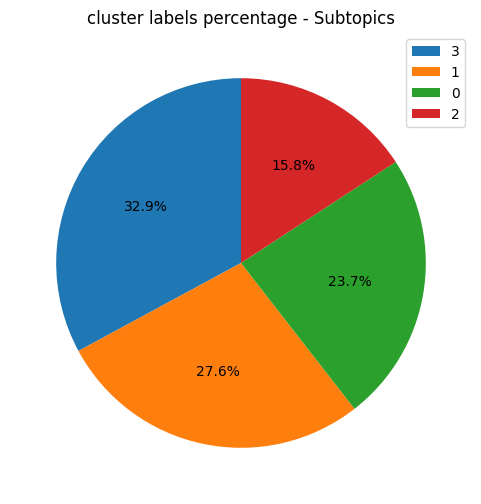

In [989]:
# Make the clusterization with the optimal number of clusters and the best parameters
#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 5, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
kmeans= KMeans(algorithm='elkan', copy_x=True, init='random', max_iter=100, n_clusters=4, n_init='auto', random_state=42, tol=1e-05)
kmeans.fit(OBJ)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['OBJ_cluster_labels'] = cluster_labels
# OBJ
OBJ_=OBJ.copy()
OBJ_['OBJ_cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['OBJ_cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster labels percentage - Subtopics',figsize=(6,6))
plt.ylabel('')
plt.show()

In [990]:
df_centroids = pd.DataFrame(centroids)

# Asigna nombres a las columnas para facilitar la interpretación
# Supongamos que tus datos originales tienen columnas nombradas como 'col0', 'col1', ..., 'col51'
# Reemplaza 'colX' con los nombres reales de tus columnas en tu dataset original
df_centroids.columns = ['col'+str(i) for i in range(17)]

# Imprime el DataFrame para ver los centroides en formato tabular
df_centroids

col0      col1      col2      col3          col4      col5      col6   
0  0.583333  0.333333  0.833333  0.111111  5.555556e-02  0.488889  0.388889  \
1  0.666667  0.000000  0.428571  0.476190  2.857143e-01  0.371429  0.285714   
2  0.500000  0.583333  0.166667  0.166667  7.500000e-01  0.550000  0.583333   
3  0.820000  1.000000  0.200000  0.040000  1.110223e-16  0.340000  0.240000   

       col7      col8      col9     col10     col11     col12     col13   
0  0.833333  0.833333  0.111111  0.833333  0.055556  0.555556  0.888889  \
1  0.714286  0.238095  0.190476  0.476190  0.095238  0.190476  0.047619   
2  0.416667  0.583333  0.833333  0.833333  0.250000  0.333333  1.000000   
3  0.760000  0.240000  0.200000  0.440000  0.520000  0.200000  0.080000   

      col14     col15     col16  
0  1.000000  0.581699  0.513889  
1  0.857143  0.420568  0.404762  
2  1.000000  0.668768  0.187500  
3  0.640000  0.367731  0.420000

## 2.4 PREDICT LABELS DAY 1

In [991]:
# Calcula las distancias a los centroides existentes
distances_OBJ_label1 = cdist(OBJ_label1, centroids)
print(distances_OBJ_label1,"\n")

# Obtiene el índice del centroide más cercano para cada nuevo registro
predicted_labels = np.argmin(distances_OBJ_label1, axis=1)
print(predicted_labels)

[[1.94452026 1.59561578 2.04531785 1.86214223]
 [2.07772934 2.29594887 1.53631842 2.32419358]
 [0.94411499 2.07863394 1.8005059  1.9390524 ]
 [1.29278676 2.23920251 1.70975124 2.09957651]
 [0.99673536 2.10345705 1.93078329 1.95312169]
 [1.8659848  1.81484478 1.79858739 2.03766758]
 [2.30923494 2.20096376 1.95409112 1.95623096]] 

[1 2 0 0 0 2 2]


In [992]:
# Calcula las distancias a los centroides existentes
distances_OBJ_label1 = cdist(OBJ_label1, centroids)
print(distances_OBJ_label1,"\n")

# Obtiene el índice del centroide más cercano para cada nuevo registro
predicted_labels = np.argmin(distances_OBJ_label1, axis=1)
print(predicted_labels)

[[1.94452026 1.59561578 2.04531785 1.86214223]
 [2.07772934 2.29594887 1.53631842 2.32419358]
 [0.94411499 2.07863394 1.8005059  1.9390524 ]
 [1.29278676 2.23920251 1.70975124 2.09957651]
 [0.99673536 2.10345705 1.93078329 1.95312169]
 [1.8659848  1.81484478 1.79858739 2.03766758]
 [2.30923494 2.20096376 1.95409112 1.95623096]] 

[1 2 0 0 0 2 2]


In [993]:
print(predicted_labels,"\n")
while True:
    # Contar la cantidad de elementos en cada cluster
    predicted_labels_counts = pd.Series(predicted_labels).value_counts()
    print(predicted_labels_counts)

    # Encontrar el grupo con mayor proporción
    max_proportion_cluster = predicted_labels_counts.idxmax()
    print("max_proportion_cluster",max_proportion_cluster)
    max_proportion = predicted_labels_counts[max_proportion_cluster] / len(predicted_labels)
    print("max_proportion",max_proportion)

    # Si el grupo con mayor proporción supera el umbral, ajustar las asignaciones
    if max_proportion > 0.43:
        # Encontrar el grupo con menor proporción
        min_proportion_cluster = predicted_labels_counts.idxmin()
        print("min_proportion_cluster",min_proportion_cluster)

        # Encontrar el índice del registro en el grupo con mayor proporción que tiene la menor distancia al grupo con menor proporción
        distances_to_min_proportion = distances_OBJ_label1[predicted_labels == max_proportion_cluster, min_proportion_cluster]
        print("distances_to_min_proportion",distances_to_min_proportion)
        index_to_change = np.argmin(distances_to_min_proportion)

        # Obtener el índice original del registro a cambiar
        original_index_to_change = np.where(predicted_labels == max_proportion_cluster)[0][index_to_change]

        # Cambiar la asignación del registro al grupo con menor proporción
        predicted_labels[original_index_to_change] = min_proportion_cluster
    else:
        # Si la proporción del grupo más grande es menor o igual al umbral, salir del bucle
        break

# Mostrar resultados finales
print("\n")
print(predicted_labels)
predicted_labels_counts = pd.Series(predicted_labels).value_counts()

[1 2 0 0 0 2 2] 

2    3
0    3
1    1
Name: count, dtype: int64
max_proportion_cluster 2
max_proportion 0.42857142857142855


[1 2 0 0 0 2 2]


In [994]:
distances_OBJ_label1

array([[1.94452026, 1.59561578, 2.04531785, 1.86214223],
       [2.07772934, 2.29594887, 1.53631842, 2.32419358],
       [0.94411499, 2.07863394, 1.8005059 , 1.9390524 ],
       [1.29278676, 2.23920251, 1.70975124, 2.09957651],
       [0.99673536, 2.10345705, 1.93078329, 1.95312169],
       [1.8659848 , 1.81484478, 1.79858739, 2.03766758],
       [2.30923494, 2.20096376, 1.95409112, 1.95623096]])

In [995]:
encuesta1_label1=encuesta1_label[(encuesta1_label['DAY']==1)|(encuesta1_label['DAY']==0)]
encuesta1_label1['labels']=predicted_labels
encuesta1_label1['labels2']=encuesta1_label1['labels']+1
encuesta1_label1

C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\155170483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encuesta1_label1['labels']=predicted_labels
C:\Users\xavie\AppData\Local\Temp\ipykernel_16624\155170483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encuesta1_label1['labels2']=encuesta1_label1['labels']+1


PP_género_Mujer  PP_género_Hombre  PP_género_NB  PP_género_PND   
52                1                 0             0              0  \
65                0                 0             1              0   
79                0                 1             0              0   
80                0                 1             0              0   
82                0                 1             0              0   
83                1                 0             0              0   
84                0                 1             0              0   

    XX_PP_edad  PP_estado_civil_soltero  PP_estado_civil_Casado   
52    0.333333                        1                       0  \
65    0.333333                        1                       0   
79    0.500000                        1                       0   
80    0.166667                        1                       0   
82    0.333333                        1                       0   
83    0.166667                        1                       0   
84    0.333333                        1                       0   

    PP_estado_civil_relación  PP_estado_civil_separado  PP_estado_civil_viudo   
52                         0                         0                      0  \
65                         0                         0                      0   
79                         0                         0                      0   
80                         0                         0                      0   
82                         0                         0                      0   
83                         0                         0                      0   
84                         0                         0                      0   

    ...  TFM_compartir_no_sala  TFM_compartir_no_cocina   
52  ...                      0                        0  \
65  ...                      0                        0   
79  ...                      0                        1   
80  ...                      0                        0   
82  ...                      1                        0   
83  ...                      0                        1   
84  ...                      1                        0   

    TFM_compartir_no_lavadero  TFM_compartir_no_jardín   
52                          0                        0  \
65                          0                        0   
79                          0                        0   
80                          0                        0   
82                          0                        0   
83                          0                        0   
84                          0                        0   

    TFM_compartir_no_todos  TFM_muadrse                             correo   
52                       1            0           floresrojas.am@gmail.com  \
65                       1            1             lucasonsound@gmail.com   
79                       0            1         alejandrocavazos@gmail.com   
80                       1            1  rodrigoiglesiasmurrieta@gmail.com   
82                       0            1                relookyou@gmail.com   
83                       0            1          marta.dlatorreg@gmail.com   
84                       0            1                                 No   

    DAY  labels  labels2  
52    1       1        2  
65    1       2        3  
79    0       0        1  
80    0       0        1  
82    0       0        1  
83    1       2        3  
84    0       2        3  

[7 rows x 190 columns]

In [996]:
encuesta1_label1.loc[encuesta1_label1['correo']=="alejandrocavazos@gmail.com",'labels2'] = 4
encuesta1_label1.loc[encuesta1_label1['correo']=="No",'labels2'] = 4

encuesta1_label1

PP_género_Mujer  PP_género_Hombre  PP_género_NB  PP_género_PND   
52                1                 0             0              0  \
65                0                 0             1              0   
79                0                 1             0              0   
80                0                 1             0              0   
82                0                 1             0              0   
83                1                 0             0              0   
84                0                 1             0              0   

    XX_PP_edad  PP_estado_civil_soltero  PP_estado_civil_Casado   
52    0.333333                        1                       0  \
65    0.333333                        1                       0   
79    0.500000                        1                       0   
80    0.166667                        1                       0   
82    0.333333                        1                       0   
83    0.166667                        1                       0   
84    0.333333                        1                       0   

    PP_estado_civil_relación  PP_estado_civil_separado  PP_estado_civil_viudo   
52                         0                         0                      0  \
65                         0                         0                      0   
79                         0                         0                      0   
80                         0                         0                      0   
82                         0                         0                      0   
83                         0                         0                      0   
84                         0                         0                      0   

    ...  TFM_compartir_no_sala  TFM_compartir_no_cocina   
52  ...                      0                        0  \
65  ...                      0                        0   
79  ...                      0                        1   
80  ...                      0                        0   
82  ...                      1                        0   
83  ...                      0                        1   
84  ...                      1                        0   

    TFM_compartir_no_lavadero  TFM_compartir_no_jardín   
52                          0                        0  \
65                          0                        0   
79                          0                        0   
80                          0                        0   
82                          0                        0   
83                          0                        0   
84                          0                        0   

    TFM_compartir_no_todos  TFM_muadrse                             correo   
52                       1            0           floresrojas.am@gmail.com  \
65                       1            1             lucasonsound@gmail.com   
79                       0            1         alejandrocavazos@gmail.com   
80                       1            1  rodrigoiglesiasmurrieta@gmail.com   
82                       0            1                relookyou@gmail.com   
83                       0            1          marta.dlatorreg@gmail.com   
84                       0            1                                 No   

    DAY  labels  labels2  
52    1       1        2  
65    1       2        3  
79    0       0        4  
80    0       0        1  
82    0       0        1  
83    1       2        3  
84    0       2        4  

[7 rows x 190 columns]

In [642]:
len(encuesta1_label1.columns)

190

In [997]:
grupos=encuesta1_label1.iloc[:,186:]
grupos=grupos.drop(['DAY','labels'], axis=1)
grupos.to_excel('grupos.xlsx')
grupos

correo  labels2
52           floresrojas.am@gmail.com        2
65             lucasonsound@gmail.com        3
79         alejandrocavazos@gmail.com        4
80  rodrigoiglesiasmurrieta@gmail.com        1
82                relookyou@gmail.com        1
83          marta.dlatorreg@gmail.com        3
84                                 No        4

In [311]:
encuesta1_label1['XX_IND_ratioColectivismo']

2     0.619048
52    0.285714
65    0.380952
68    0.238095
78    0.666667
79    0.809524
82    0.523810
Name: XX_IND_ratioColectivismo, dtype: float64

## 2.5 PREDICT LABELS DAY 2

In [59]:
# Calcula las distancias a los centroides existentes
distances_OBJ_label2 = cdist(OBJ_label2, centroids)
print(distances_OBJ_label2,"\n")

# Obtiene el índice del centroide más cercano para cada nuevo registro
predicted_labels2 = np.argmin(distances_OBJ_label2, axis=1)
print(predicted_labels2)

[[2.32811859 2.19886551 2.37015611 1.6086771 ]
 [0.94411499 2.07863394 1.8005059  1.9390524 ]
 [1.53873474 1.4617183  2.20245462 1.87235608]
 [0.99673536 2.10345705 1.93078329 1.95312169]] 

[3 0 1 0]


In [60]:
encuesta1_label2=encuesta1_label[(encuesta1_label['DAY']==2)|(encuesta1_label['DAY']==0)]
condition=encuesta1_label2['DAY']
condition=condition.tolist()
condition

[0, 0, 0, 0]

In [61]:
print(predicted_labels2,"\n")
while True:
    # Contar la cantidad de elementos en cada cluster
    predicted_labels2_counts = pd.Series(predicted_labels2).value_counts()
    print(predicted_labels2_counts)

    # Encontrar el grupo con mayor proporción
    max_proportion_cluster = predicted_labels2_counts.idxmax()
    print("max_proportion_cluster",max_proportion_cluster)
    max_proportion = predicted_labels2_counts[max_proportion_cluster] / len(predicted_labels2)
    print("max_proportion",max_proportion)

    # Si el grupo con mayor proporción supera el umbral, ajustar las asignaciones
    if max_proportion > 0.4:
        # Encontrar el grupo con menor proporción
        min_proportion_cluster = predicted_labels2_counts.idxmin()
        print("min_proportion_cluster",min_proportion_cluster)

        # Filtrar los índices de los registros en el grupo con mayor proporción que cumplen con la condición condition=2
        condition_2_indices = np.where((predicted_labels2 == max_proportion_cluster) & (np.array(condition) == 2))[0]

        if len(condition_2_indices) > 0:
            # Si hay al menos un registro con condition=2, seleccionar el más cercano al grupo con menor proporción
            distances_to_min_proportion = distances_OBJ_label2[condition_2_indices, min_proportion_cluster]
            print("distances_to_min_proportion_condition",distances_to_min_proportion)
            index_to_change = condition_2_indices[np.argmin(distances_to_min_proportion)]

        else:
            # Si no hay registros con condition=2, seleccionar el más cercano al grupo con menor proporción
            distances_to_min_proportion = distances_OBJ_label2[predicted_labels2 == max_proportion_cluster, min_proportion_cluster]
            print("distances_to_min_proportion",distances_to_min_proportion)
            index_to_change = np.argmin(distances_to_min_proportion)

        # Obtener el índice original del registro a cambiar
        original_index_to_change = np.where(predicted_labels2 == max_proportion_cluster)[0][index_to_change]

        # Cambiar la asignación del registro al grupo con menor proporción
        predicted_labels2[original_index_to_change] = min_proportion_cluster
    else:
        # Si la proporción del grupo más grande es menor o igual al umbral, salir del bucle
        break

# Mostrar resultados finales
print("\n")
print(predicted_labels2)
predicted_labels2_counts = pd.Series(predicted_labels2).value_counts()

[3 0 1 0] 

0    2
3    1
1    1
Name: count, dtype: int64
max_proportion_cluster 0
max_proportion 0.5
min_proportion_cluster 3
distances_to_min_proportion [1.9390524  1.95312169]
3    2
1    1
0    1
Name: count, dtype: int64
max_proportion_cluster 3
max_proportion 0.5
min_proportion_cluster 1
distances_to_min_proportion [2.19886551 2.07863394]
1    2
3    1
0    1
Name: count, dtype: int64
max_proportion_cluster 1
max_proportion 0.5
min_proportion_cluster 3
distances_to_min_proportion [1.9390524  1.87235608]
3    2
1    1
0    1
Name: count, dtype: int64
max_proportion_cluster 3
max_proportion 0.5
min_proportion_cluster 1
distances_to_min_proportion [2.19886551 1.4617183 ]
1    2
3    1
0    1
Name: count, dtype: int64
max_proportion_cluster 1
max_proportion 0.5
min_proportion_cluster 3
distances_to_min_proportion [1.9390524  1.87235608]
3    2
1    1
0    1
Name: count, dtype: int64
max_proportion_cluster 3
max_proportion 0.5
min_proportion_cluster 1
distances_to_min_proportion [2.1

KeyboardInterrupt: 

In [739]:
encuesta1_label2['labels']=predicted_labels2
encuesta1_label2

C:\Users\xavie\AppData\Local\Temp\ipykernel_27076\192856379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encuesta1_label2['labels']=predicted_labels2


PP_género_Mujer  PP_género_Hombre  PP_género_NB  PP_género_PND   
78                0                 0             1              0  \
79                0                 1             0              0   
81                1                 0             0              0   

    XX_PP_edad  PP_estado_civil_soltero  PP_estado_civil_Casado   
78    0.333333                        0                       0  \
79    0.500000                        1                       0   
81    0.333333                        0                       0   

    PP_estado_civil_relación  PP_estado_civil_separado  PP_estado_civil_viudo   
78                         1                         0                      0  \
79                         0                         0                      0   
81                         1                         0                      0   

    ...  TFM_compartir  TFM_compartir_no_sala  TFM_compartir_no_cocina   
78  ...              1                      0                        0  \
79  ...              1                      0                        1   
81  ...              0                      1                        0   

    TFM_compartir_no_lavadero  TFM_compartir_no_jardín   
78                          1                        0  \
79                          0                        0   
81                          0                        0   

    TFM_compartir_no_todos  TFM_muadrse                            correo   
78                       0            0  masha.bondarenko.osiej@gmail.com  \
79                       0            1        alejandrocavazos@gmail.com   
81                       0            1                                No   

    DAY  labels  
78    0       3  
79    0       0  
81    0       1  

[3 rows x 189 columns]